In [1]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Definindo o diretório onde as imagens estão armazenadas
train_data_dir = '//home/dev/PycharmProjects/FallDetection/conv/escala de cinza/Reduzido/treino'
test_data_dir = '/home/dev/PycharmProjects/FallDetection/conv/escala de cinza/Reduzido/teste'
val_data_dir = '/home/dev/PycharmProjects/FallDetection/conv/escala de cinza/Reduzido/validação'

# Definindo o número de imagens que serão utilizadas para treinamento e validação
nb_train_samples = 997 
nb_test_samples = 275
nb_val_samples = 278

# Criando um gerador de imagens para pré-processamento dos dados
# Aqui, definimos que iremos normalizar as imagens e convertê-las para escala de cinza
train_datagen = ImageDataGenerator(rescale=1./255)

# Definindo o tamanho do batch de treinamento
batch_size = 32

# Utilizando o gerador de imagens para carregar as imagens de treinamento
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        batch_size=batch_size,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        batch_size=1,
        shuffle = False,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        val_data_dir,
        batch_size=batch_size,
        class_mode='categorical')


2023-05-16 15:39:17.762261: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 15:39:17.801273: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 15:39:17.802026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 15:39:18.445909: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 997 images belonging to 8 classes.
Found 275 images belonging to 8 classes.
Found 278 images belonging to 8 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,Flatten,MaxPooling2D

#Criando a Rede CNN

modelo = Sequential()

kernel_size = 7

modelo.add(Conv2D(filters=8,kernel_size=kernel_size,activation="relu",input_shape=(256,256,3)))
modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))
#modelo.add(Conv2D(filters=16,kernel_size=3,activation="relu"))
#modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(filters=16,kernel_size=kernel_size,activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(filters=32,kernel_size=kernel_size,activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(filters=64,kernel_size=kernel_size,activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(filters=128,kernel_size=kernel_size,activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))


#modelo.add(Conv2D(filters=256,kernel_size=kernel_size,activation="relu"))
#modelo.add(MaxPooling2D(pool_size=(2,2),strides=None,padding="valid"))
#modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(160,kernel_initializer="glorot_uniform",activation="relu"))
modelo.add(Dropout(0.3))
modelo.add(Dense(8,kernel_initializer="glorot_uniform",activation='softmax'))

modelo.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])



2023-05-16 15:39:19.468696: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-16 15:39:19.469287: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
historico = modelo.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=45,
        validation_data=val_generator,
        validation_steps=nb_val_samples // batch_size)

Epoch 1/45


2023-05-16 15:39:19.720407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - ETA: 0s - loss: 2.0177 - accuracy: 0.1813

2023-05-16 15:39:58.116636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 40s 1s/step - loss: 2.0177 - accuracy: 0.1813 - val_loss: 2.0281 - val_accuracy: 0.1484
Epoch 2/45
31/31 [==============================] - 40s 1s/step - loss: 1.9799 - accuracy: 0.1946 - val_loss: 2.0294 - val_accuracy: 0.1406
Epoch 3/45
31/31 [==============================] - 39s 1s/step - loss: 1.9719 - accuracy: 0.1907 - val_loss: 2.0187 - val_accuracy: 0.1445
Epoch 4/45
31/31 [==============================] - 39s 1s/step - loss: 1.9568 - accuracy: 0.2415 - val_loss: 1.8922 - val_accuracy: 0.2930
Epoch 5/45
31/31 [==============================] - 38s 1s/step - loss: 1.3151 - accuracy: 0.5585 - val_loss: 0.7593 - val_accuracy: 0.6445
Epoch 6/45
31/31 [==============================] - 39s 1s/step - loss: 0.7675 - accuracy: 0.6964 - val_loss: 0.6149 - val_accuracy: 0.7812
Epoch 7/45
31/31 [==============================] - 39s 1s/step - loss: 0.5258 - accuracy: 0.7741 - val_loss: 0.5301 - val_accuracy: 0.7812
Epoch 8/45
31/31 [=============

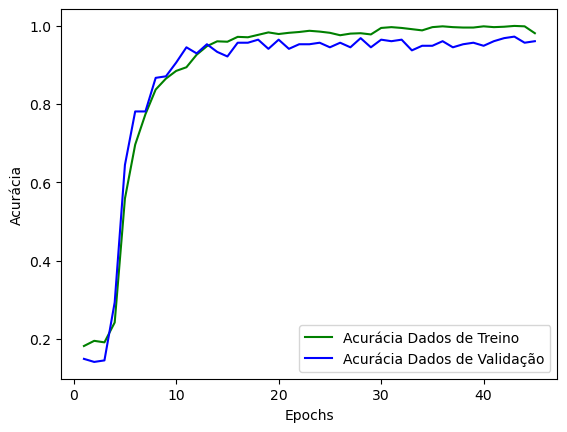

In [4]:
import matplotlib.pyplot as plt


acuracia_treino = historico.history['accuracy'] 
acuracia_val = historico.history['val_accuracy']

epochs = range(1, len(acuracia_treino)+1) 

plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

In [5]:
print(len(test_generator))

275


1/1 [==============================] - 0s 91ms/step


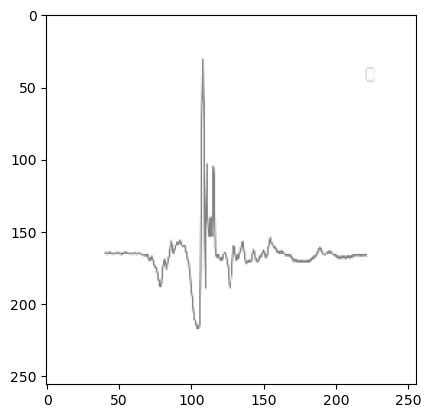

imagem: 0
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


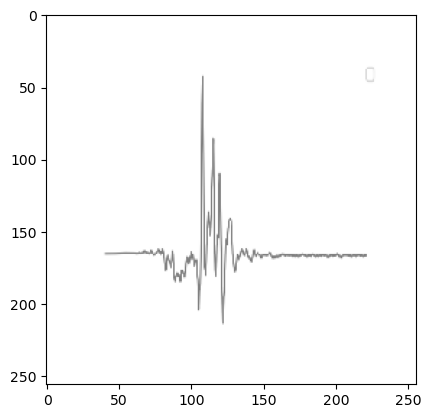

imagem: 1
label original:0
label previsto:[0]
1/1 [==============================] - 0s 23ms/step


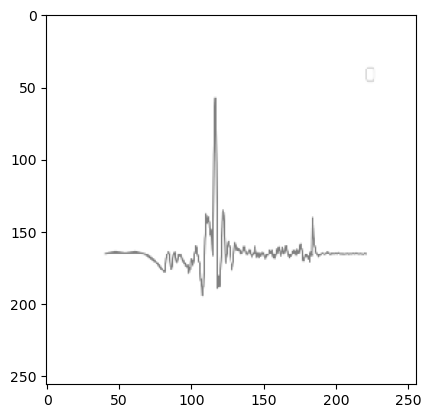

imagem: 2
label original:0
label previsto:[0]
1/1 [==============================] - 0s 23ms/step


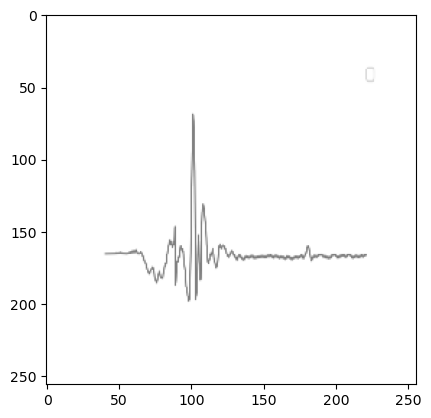

imagem: 3
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


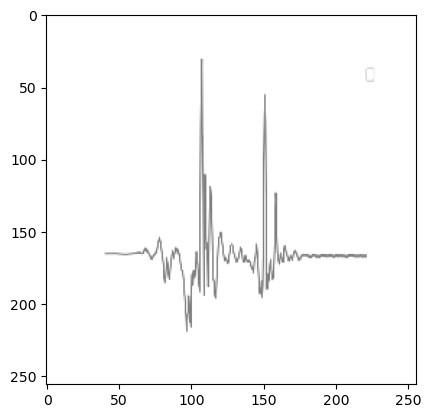

imagem: 4
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


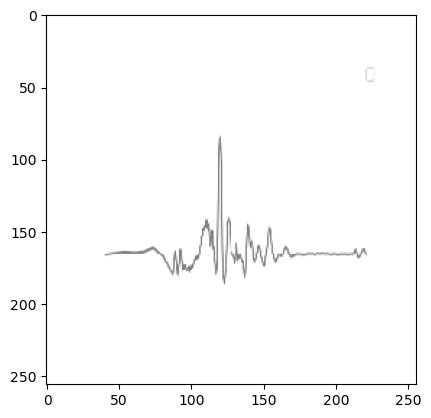

imagem: 5
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


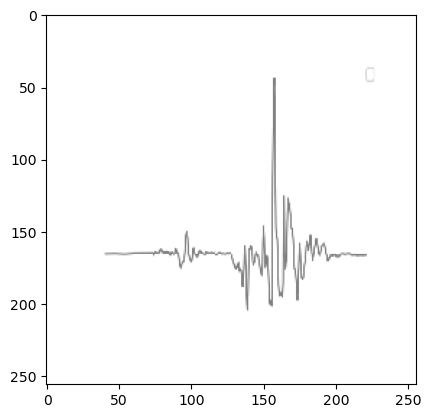

imagem: 6
label original:0
label previsto:[0]
1/1 [==============================] - 0s 22ms/step


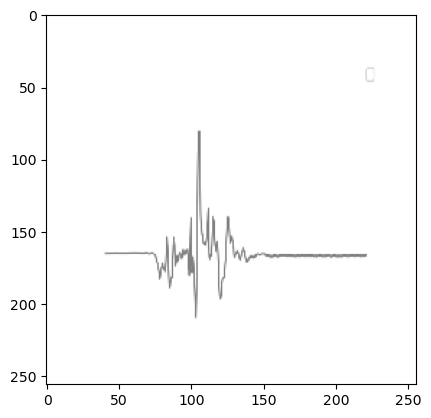

imagem: 7
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


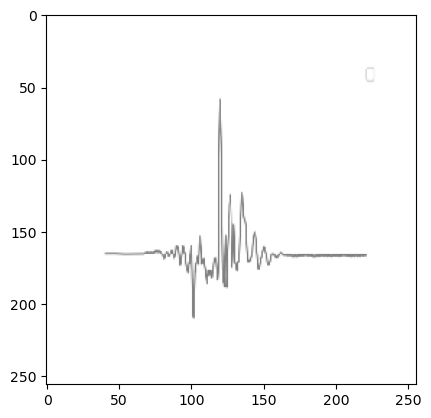

imagem: 8
label original:0
label previsto:[0]
1/1 [==============================] - 0s 23ms/step


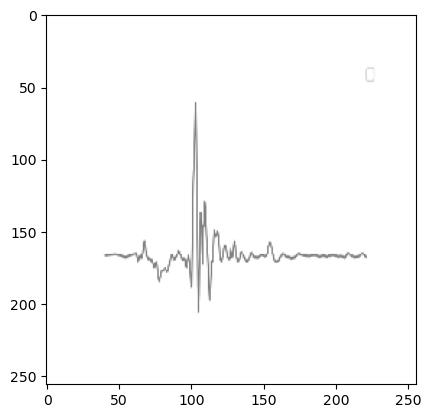

imagem: 9
label original:0
label previsto:[0]
1/1 [==============================] - 0s 22ms/step


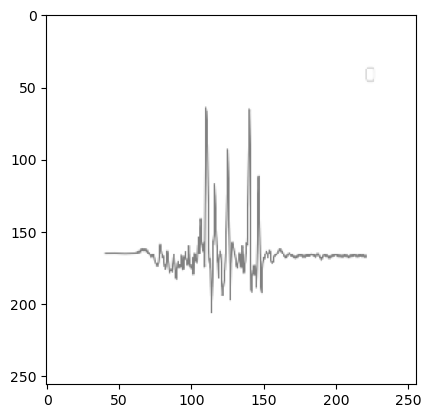

imagem: 10
label original:0
label previsto:[0]
1/1 [==============================] - 0s 22ms/step


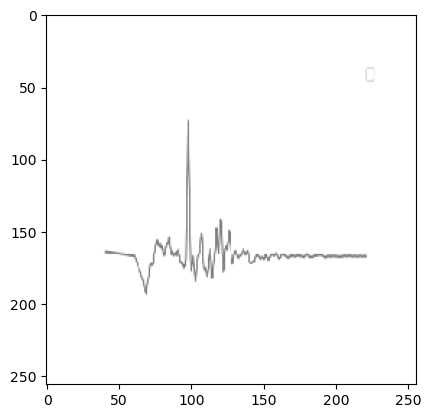

imagem: 11
label original:0
label previsto:[0]
1/1 [==============================] - 0s 22ms/step


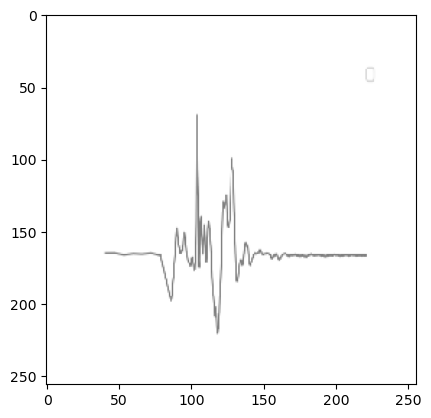

imagem: 12
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


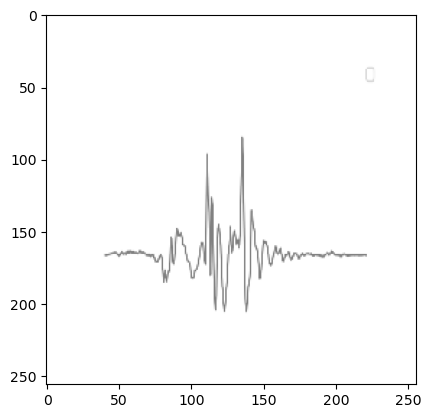

imagem: 13
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


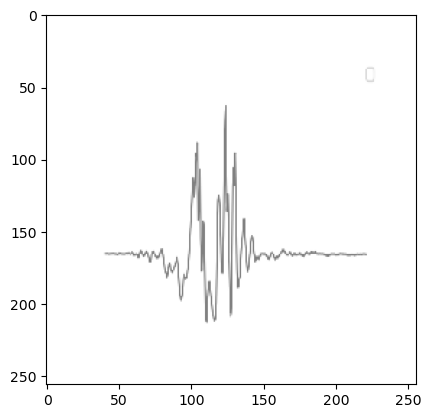

imagem: 14
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


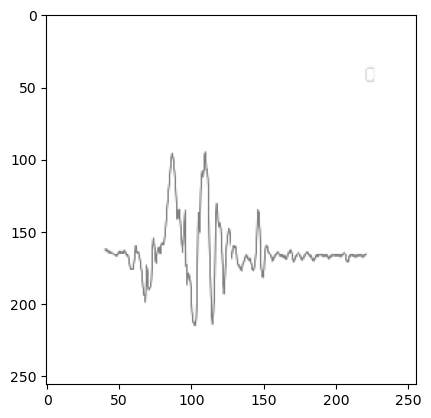

imagem: 15
label original:0
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


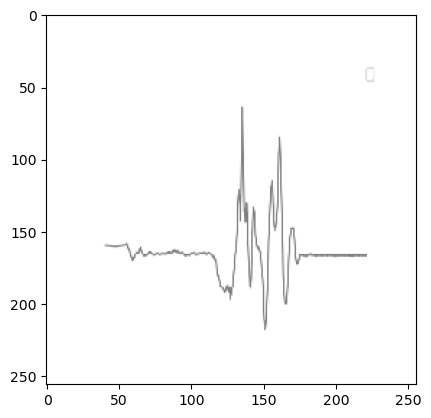

imagem: 16
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


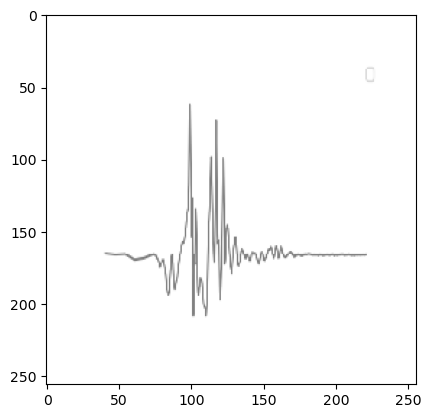

imagem: 17
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


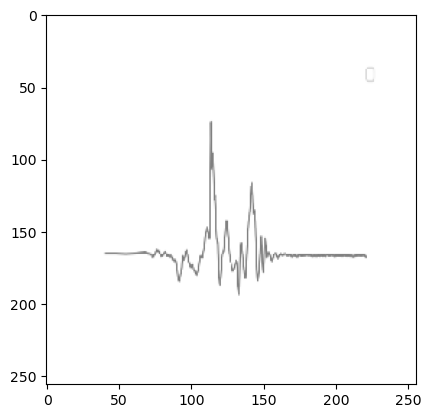

imagem: 18
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


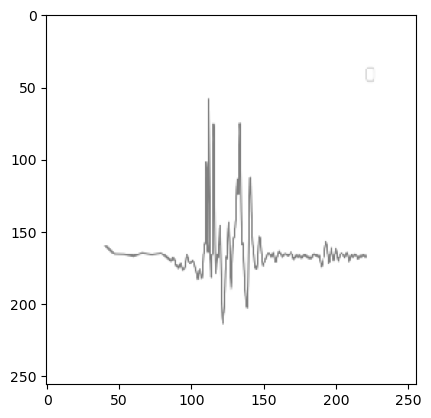

imagem: 19
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


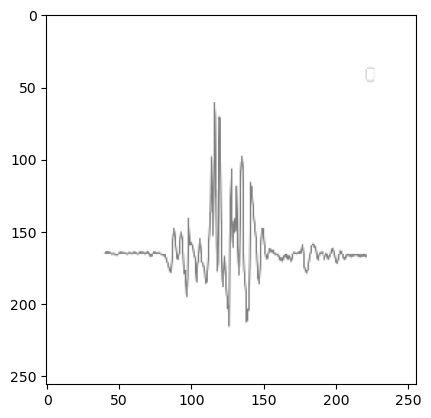

imagem: 20
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


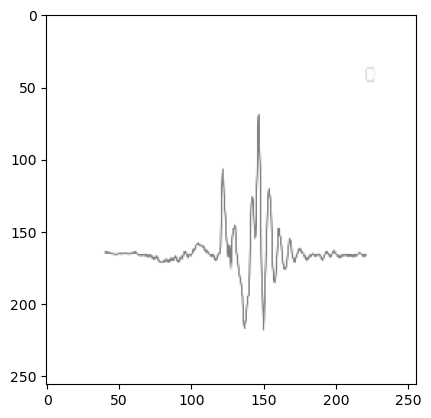

imagem: 21
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


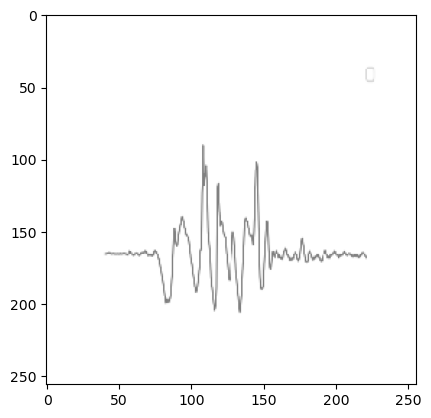

imagem: 22
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


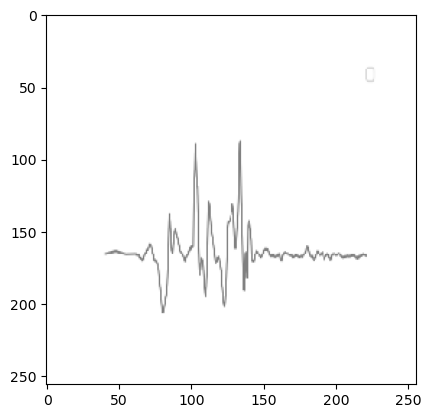

imagem: 23
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


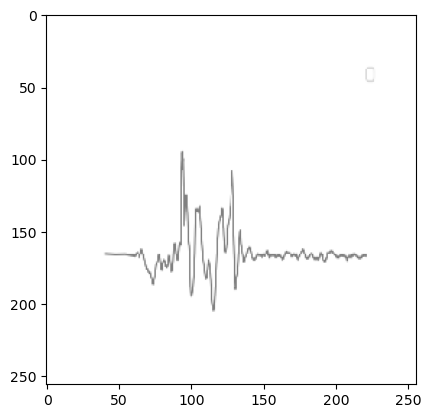

imagem: 24
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


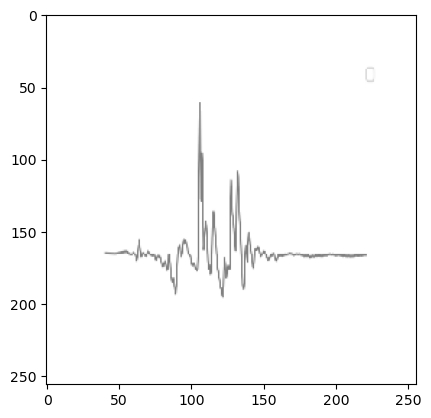

imagem: 25
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


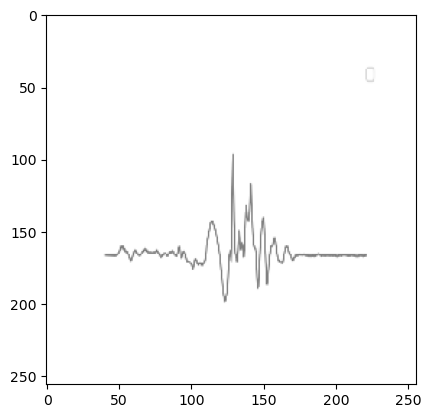

imagem: 26
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


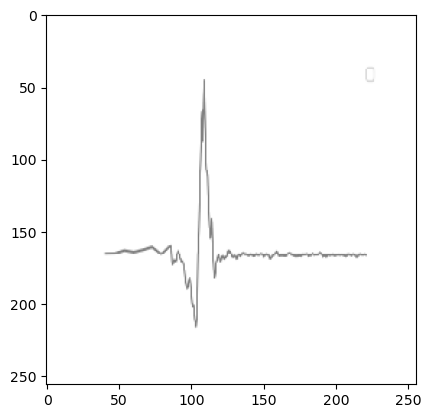

imagem: 27
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


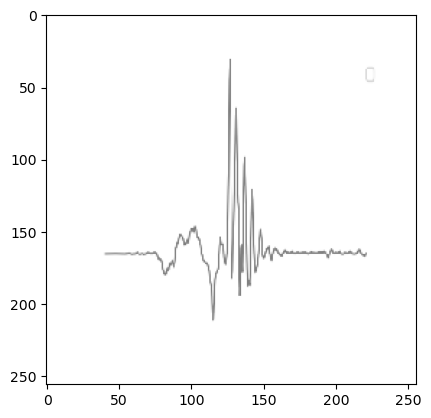

imagem: 28
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


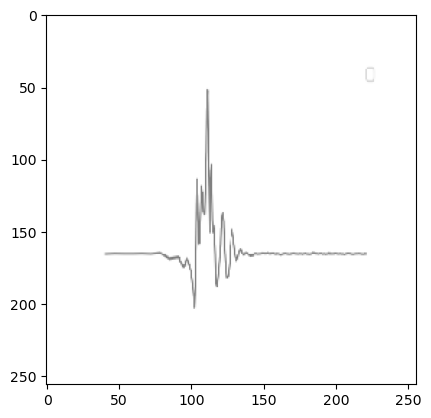

imagem: 29
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


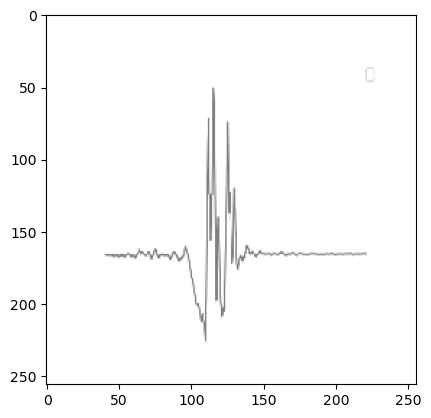

imagem: 30
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


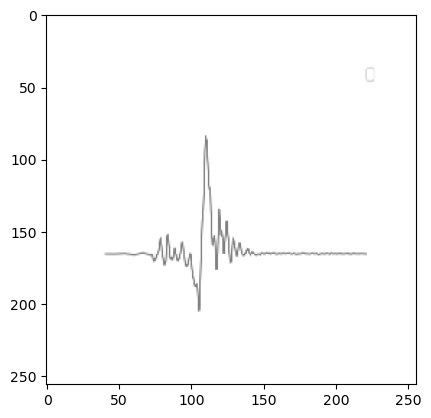

imagem: 31
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


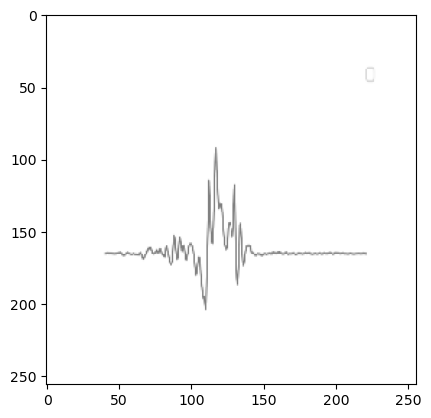

imagem: 32
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


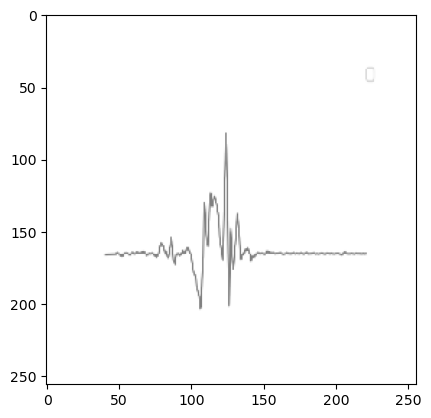

imagem: 33
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


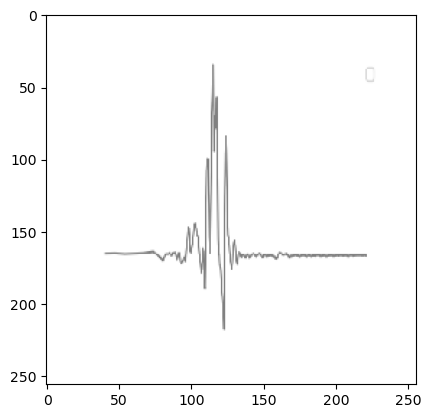

imagem: 34
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


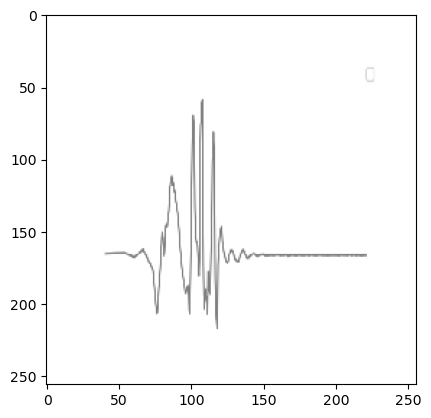

imagem: 35
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


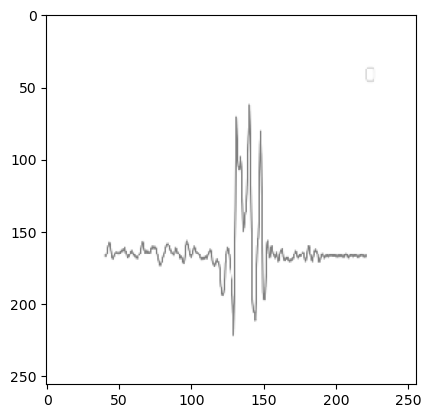

imagem: 36
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


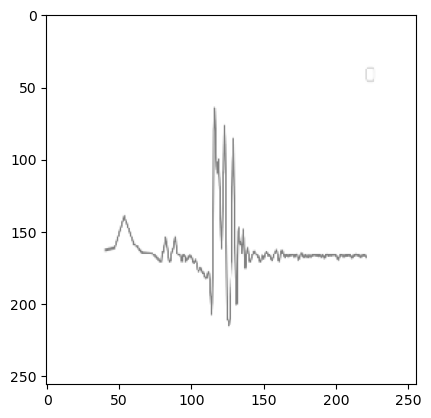

imagem: 37
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


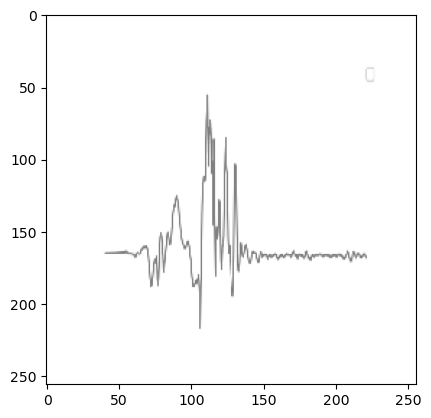

imagem: 38
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


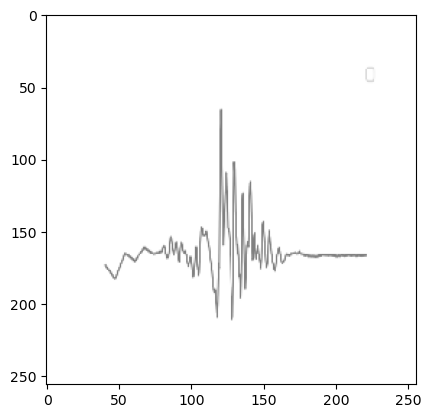

imagem: 39
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


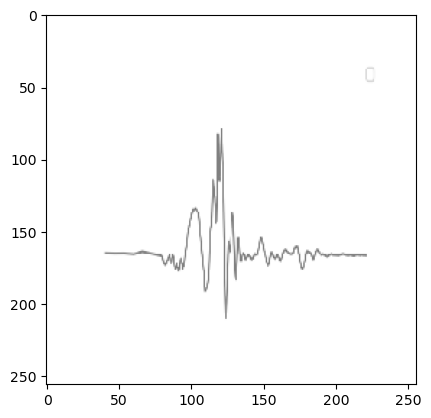

imagem: 40
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


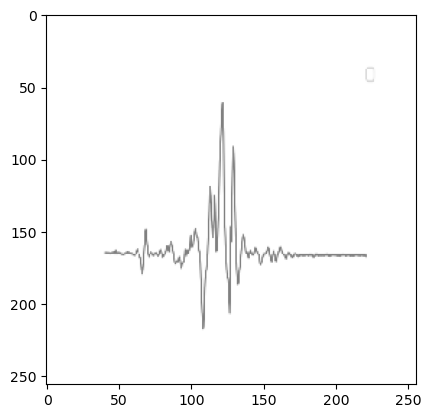

imagem: 41
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


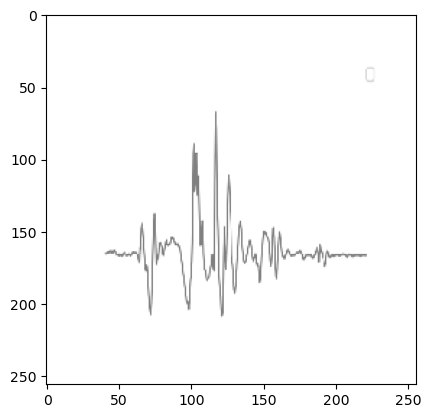

imagem: 42
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


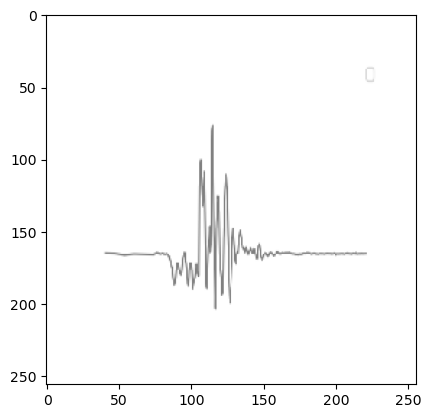

imagem: 43
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


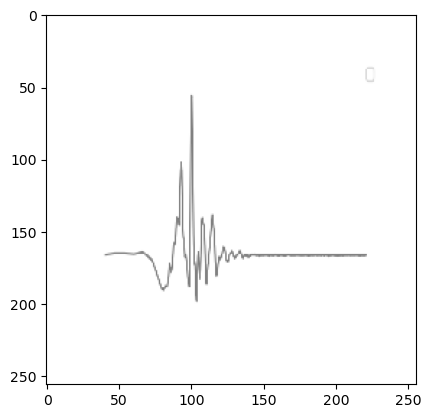

imagem: 44
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


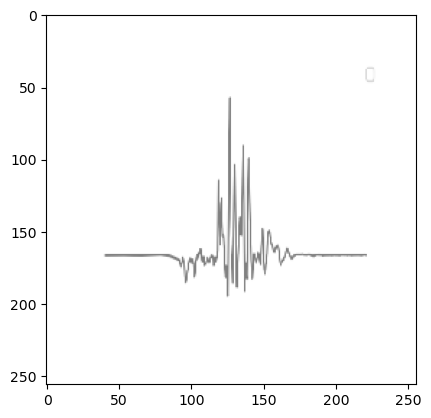

imagem: 45
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


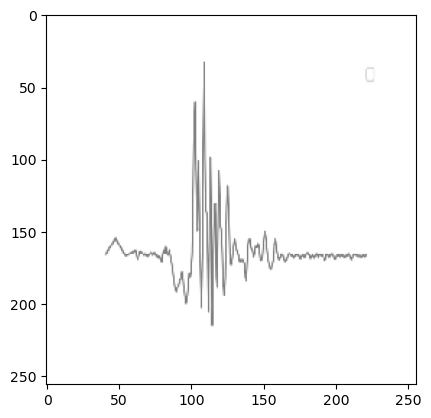

imagem: 46
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


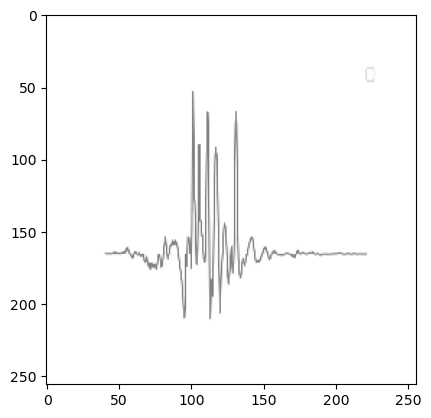

imagem: 47
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


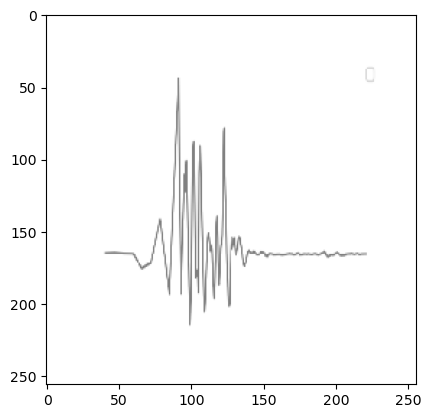

imagem: 48
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


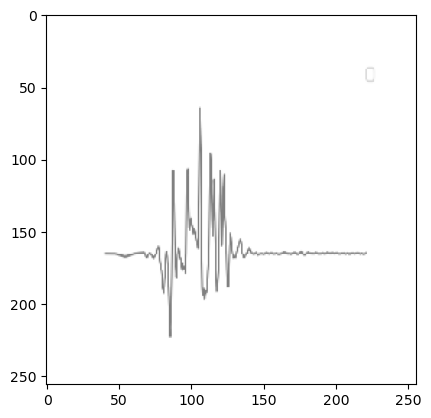

imagem: 49
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


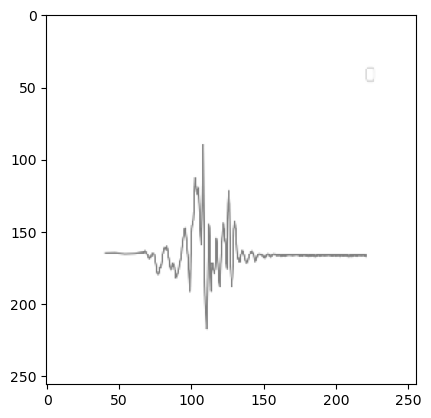

imagem: 50
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


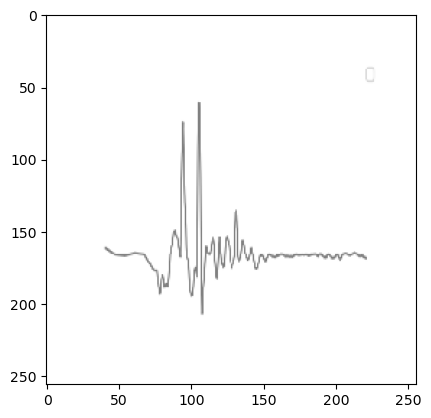

imagem: 51
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


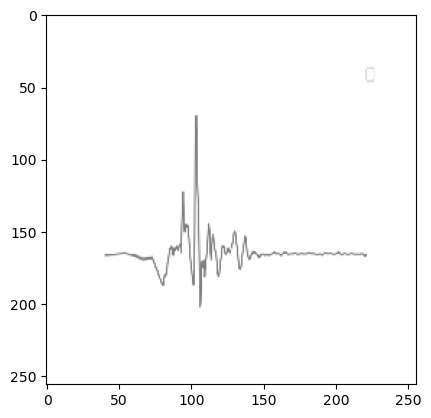

imagem: 52
label original:0
label previsto:[0]
1/1 [==============================] - 0s 20ms/step


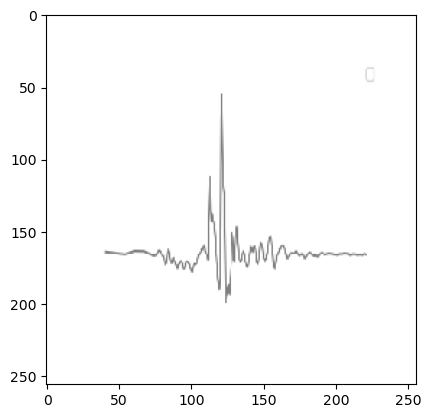

imagem: 53
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


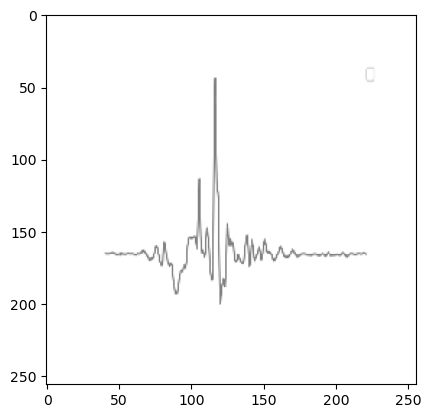

imagem: 54
label original:0
label previsto:[0]
1/1 [==============================] - 0s 21ms/step


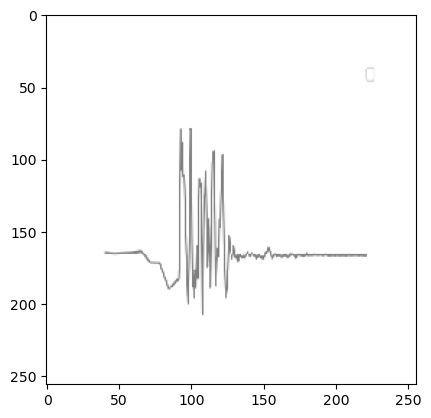

imagem: 55
label original:0
label previsto:[0]
1/1 [==============================] - 0s 23ms/step


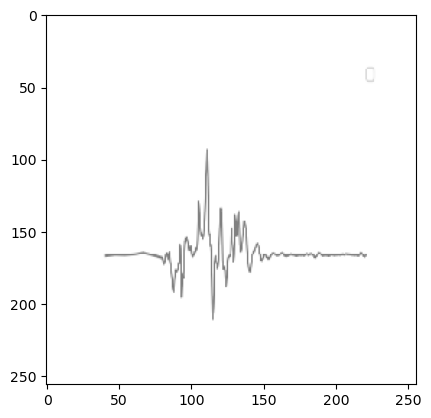

imagem: 56
label original:0
label previsto:[0]
1/1 [==============================] - 0s 22ms/step


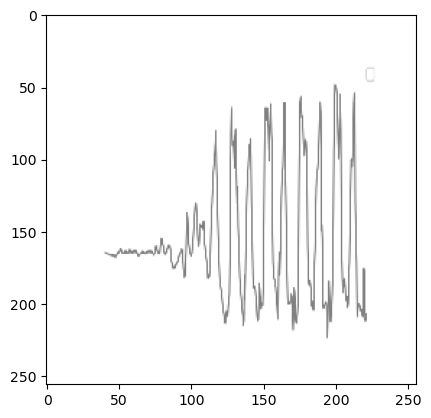

imagem: 57
label original:1
label previsto:[1]
1/1 [==============================] - 0s 22ms/step


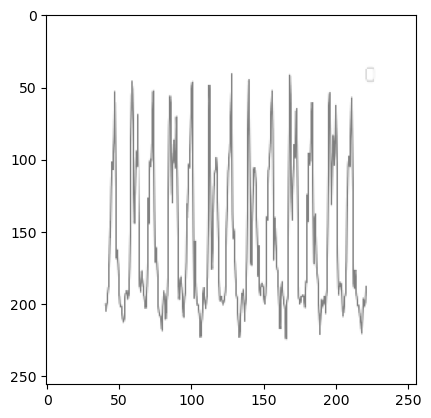

imagem: 58
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


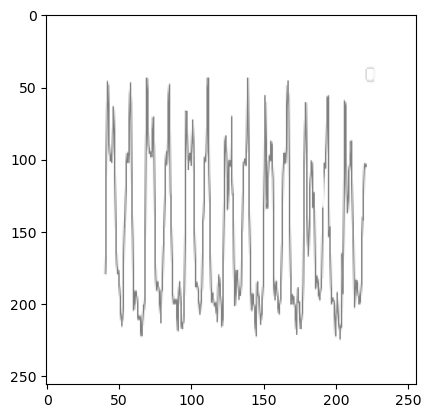

imagem: 59
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


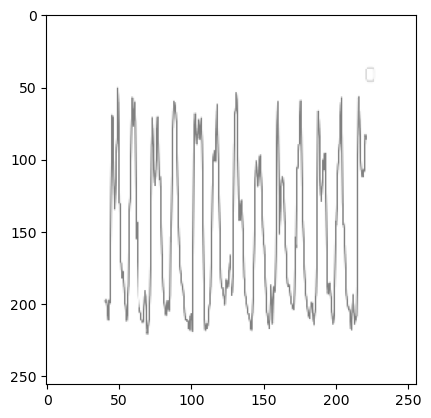

imagem: 60
label original:1
label previsto:[1]
1/1 [==============================] - 0s 22ms/step


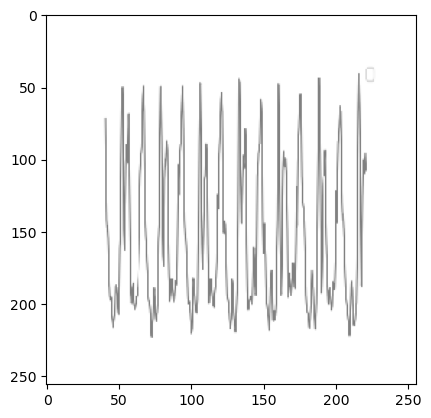

imagem: 61
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


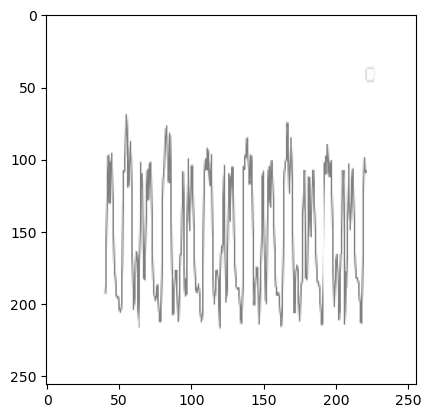

imagem: 62
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


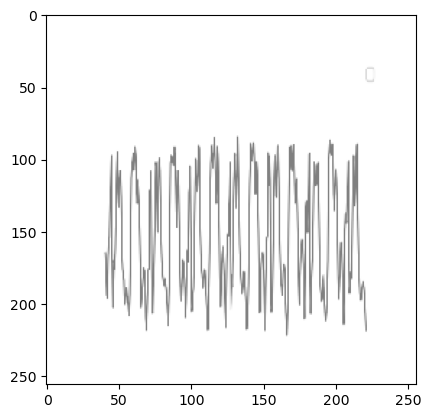

imagem: 63
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


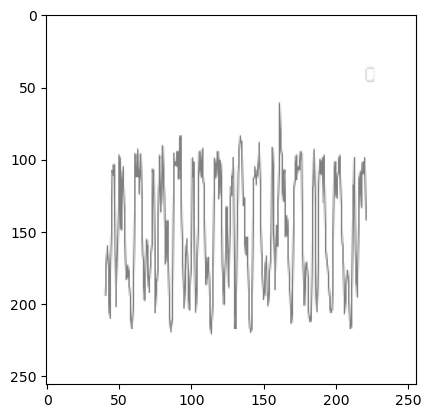

imagem: 64
label original:1
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


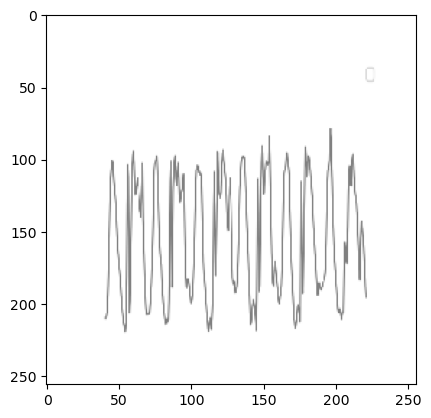

imagem: 65
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


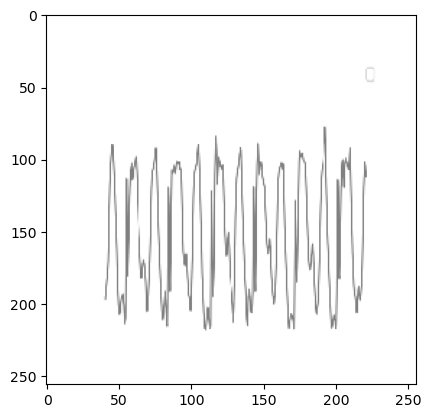

imagem: 66
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


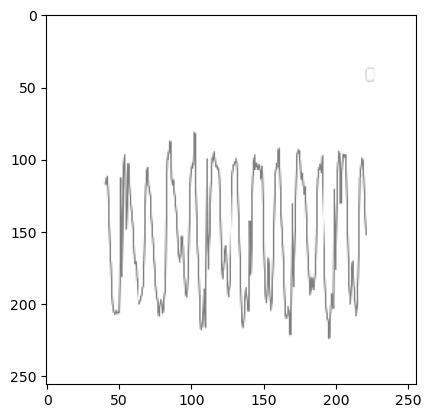

imagem: 67
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


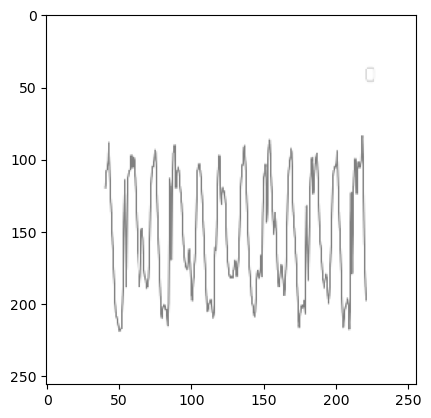

imagem: 68
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


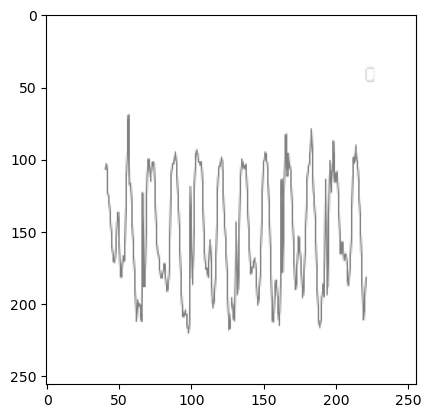

imagem: 69
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


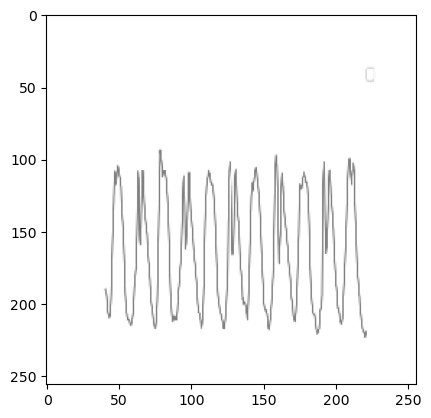

imagem: 70
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


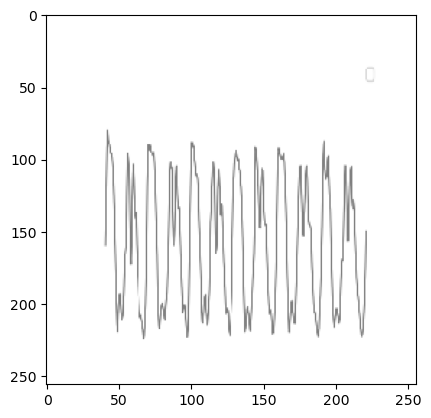

imagem: 71
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


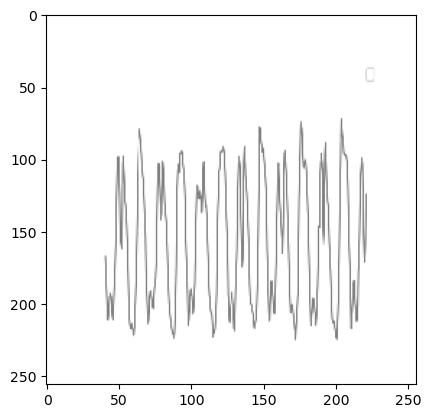

imagem: 72
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


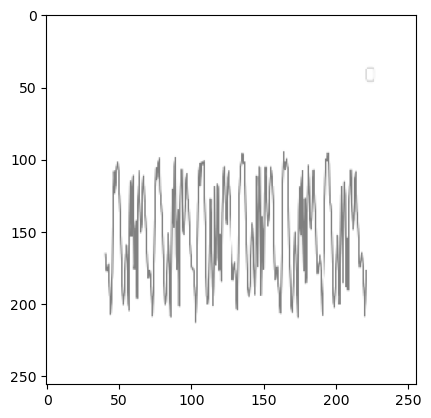

imagem: 73
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


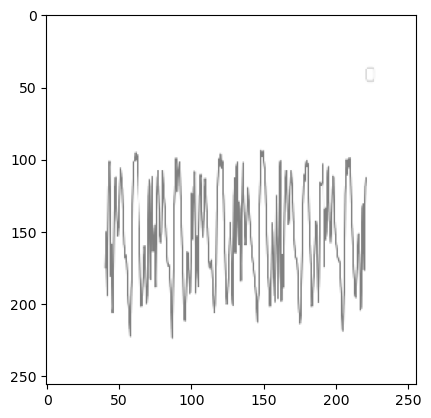

imagem: 74
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


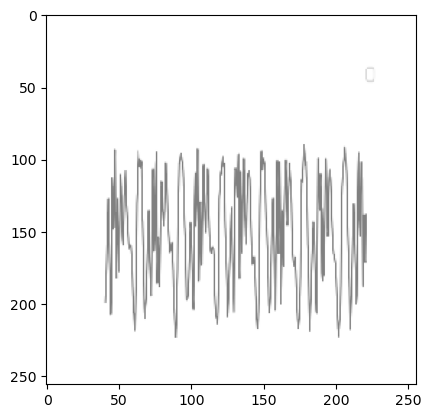

imagem: 75
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


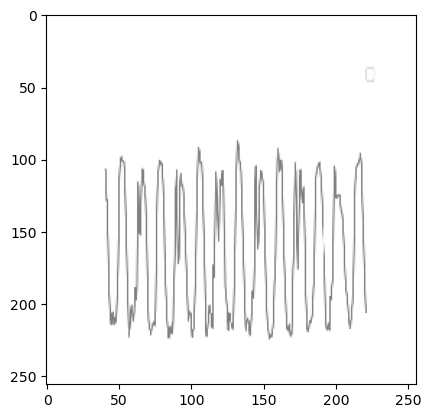

imagem: 76
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


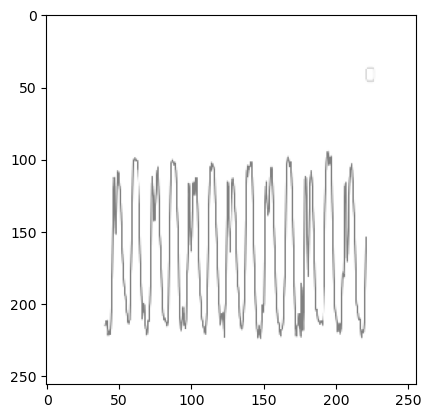

imagem: 77
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


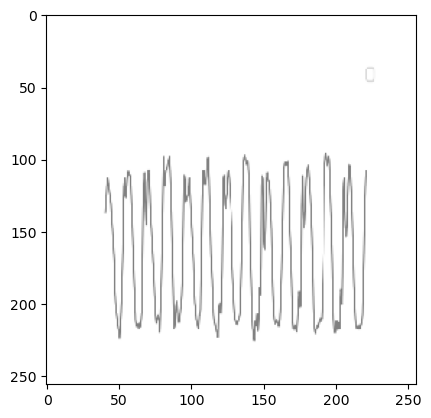

imagem: 78
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


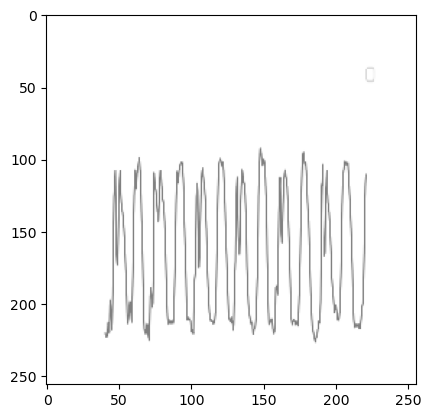

imagem: 79
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


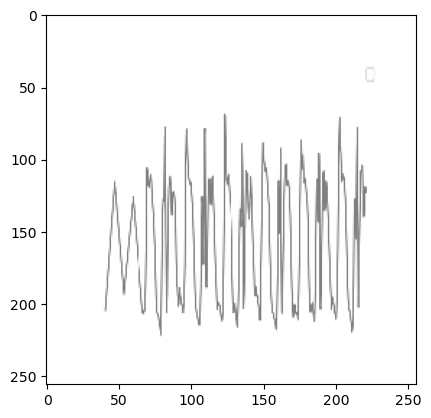

imagem: 80
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


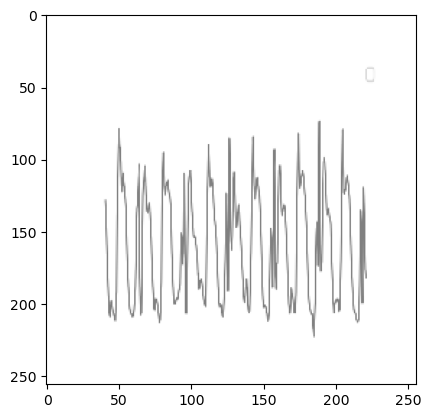

imagem: 81
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


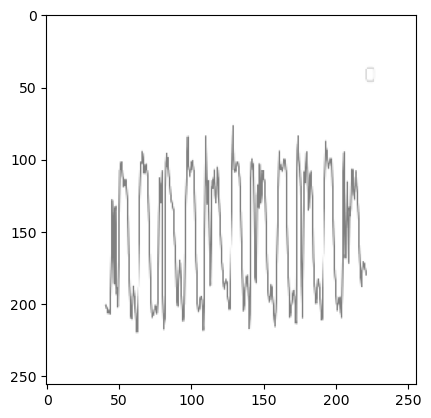

imagem: 82
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


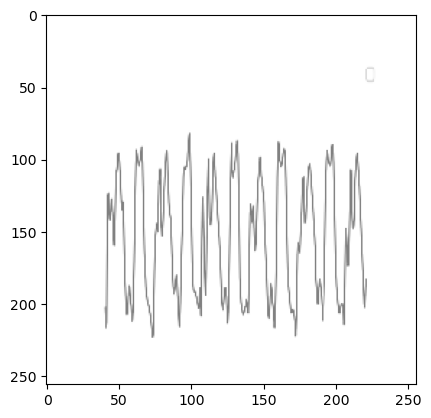

imagem: 83
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


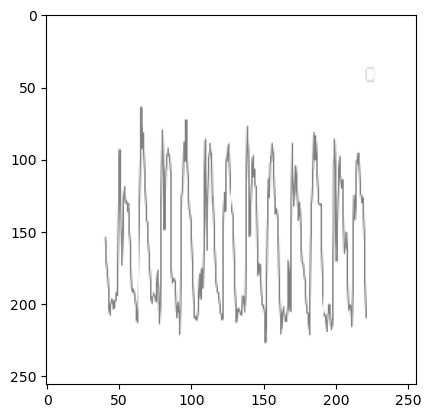

imagem: 84
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


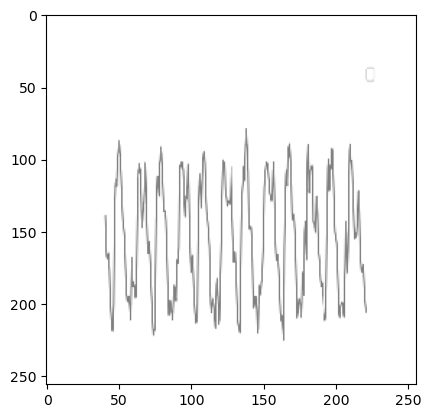

imagem: 85
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


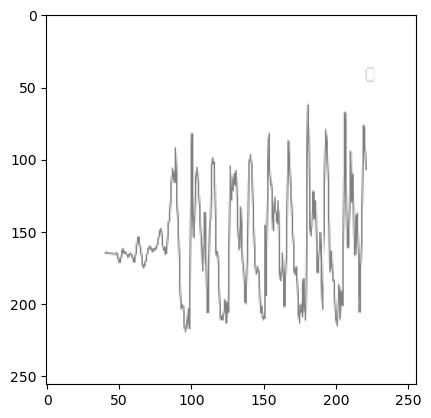

imagem: 86
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


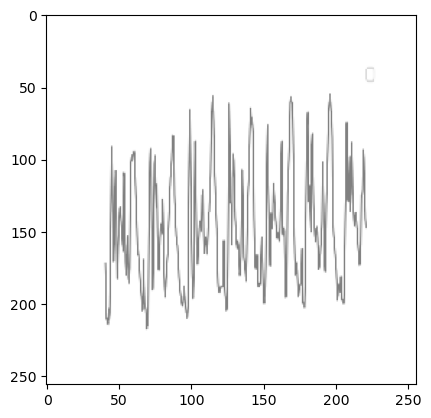

imagem: 87
label original:1
label previsto:[1]
1/1 [==============================] - 0s 21ms/step


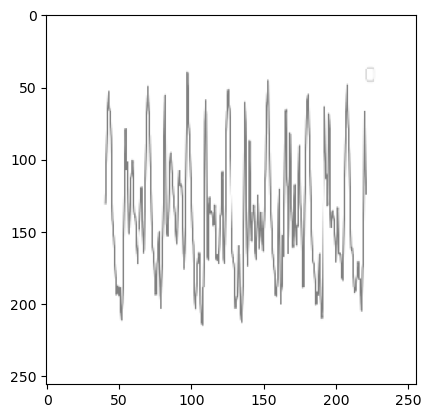

imagem: 88
label original:1
label previsto:[1]
1/1 [==============================] - 0s 20ms/step


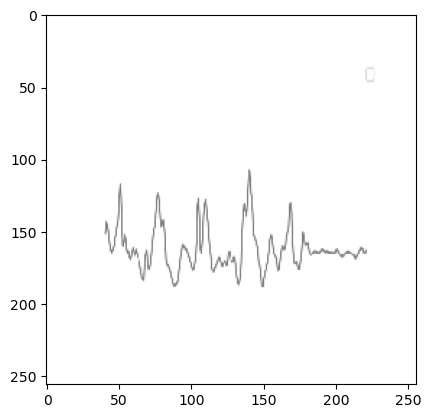

imagem: 89
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


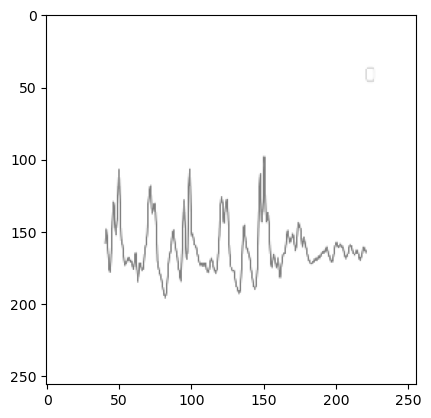

imagem: 90
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


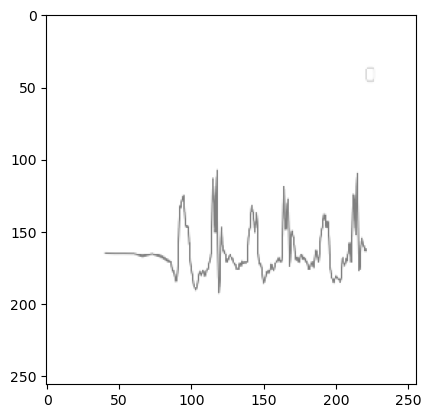

imagem: 91
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


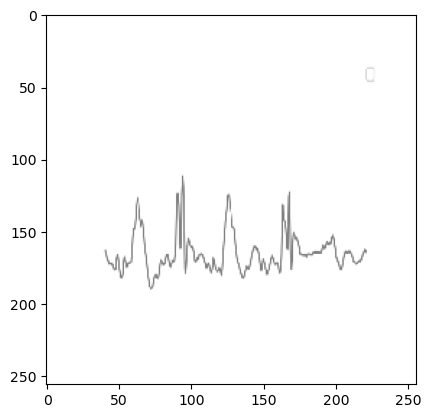

imagem: 92
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


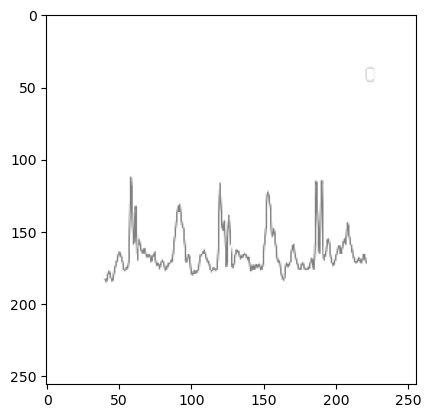

imagem: 93
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


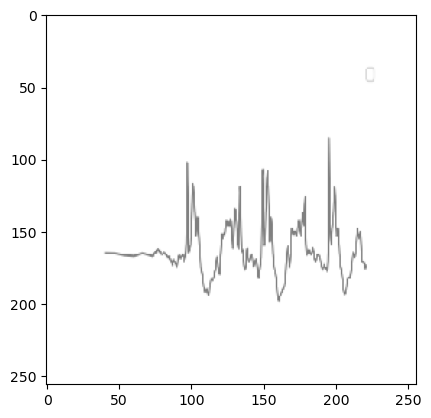

imagem: 94
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


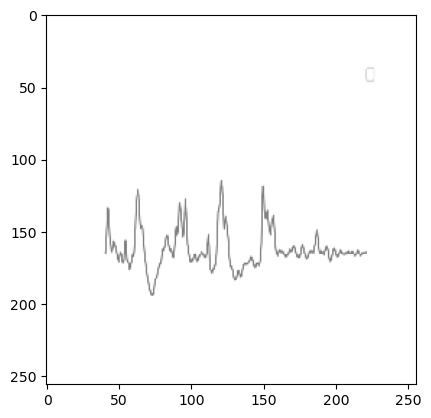

imagem: 95
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


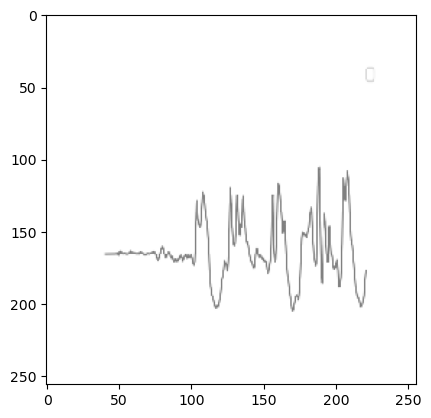

imagem: 96
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


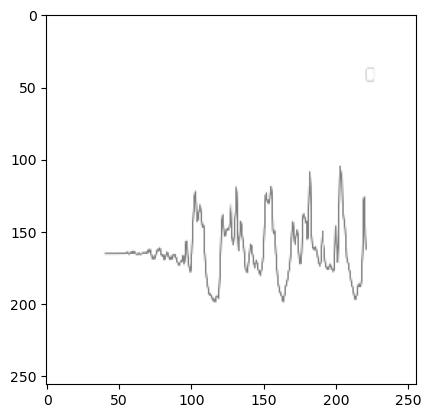

imagem: 97
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


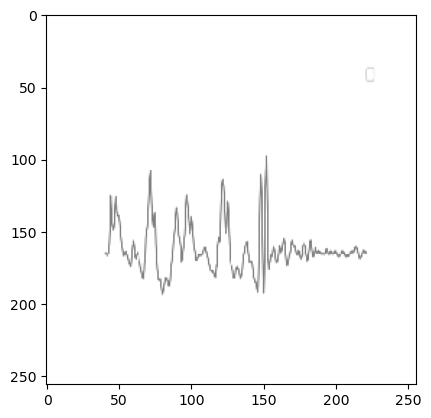

imagem: 98
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


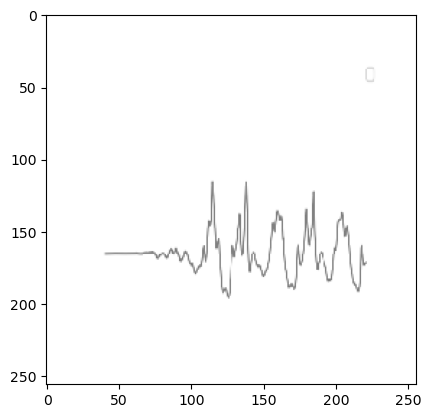

imagem: 99
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


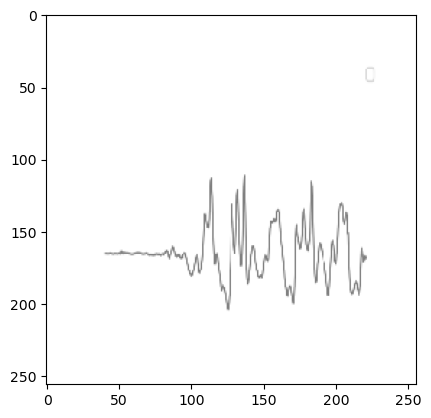

imagem: 100
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


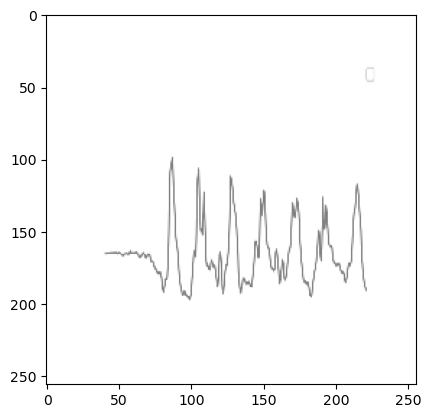

imagem: 101
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


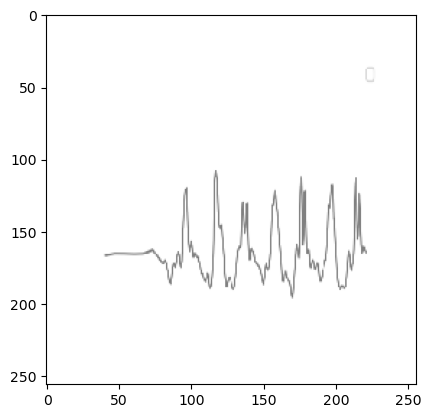

imagem: 102
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


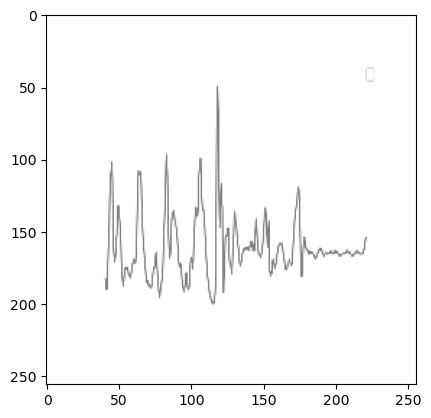

imagem: 103
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


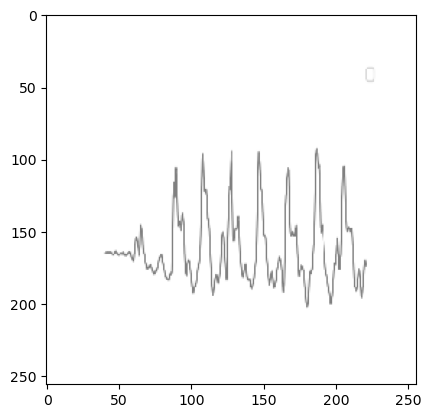

imagem: 104
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


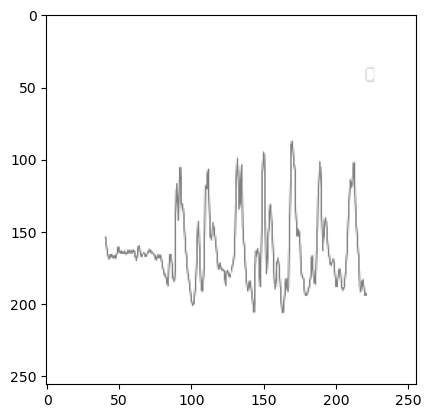

imagem: 105
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


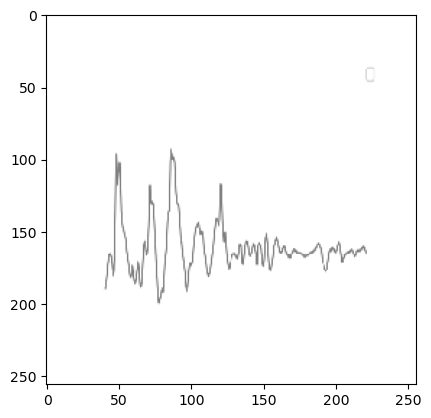

imagem: 106
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


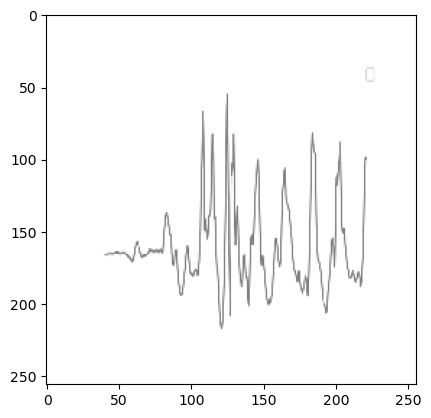

imagem: 107
label original:2
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


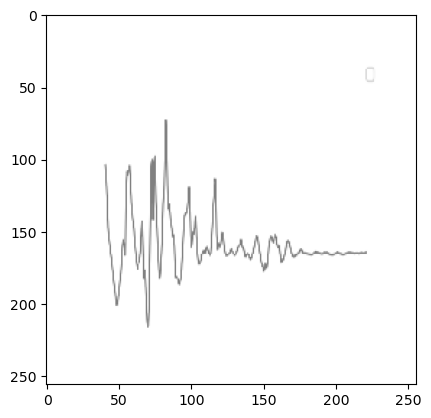

imagem: 108
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


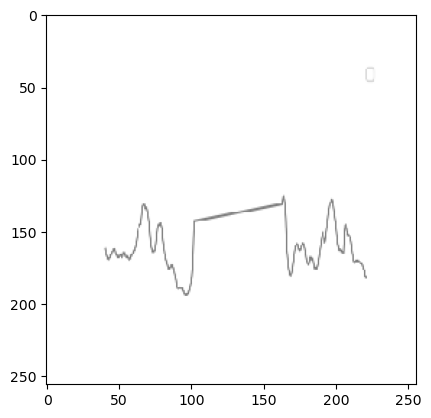

imagem: 109
label original:2
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


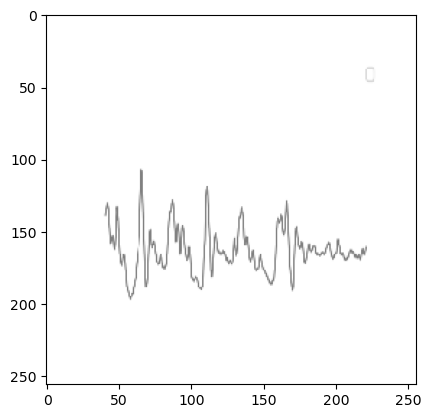

imagem: 110
label original:2
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


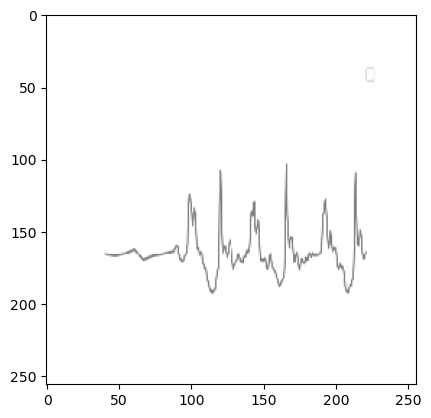

imagem: 111
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


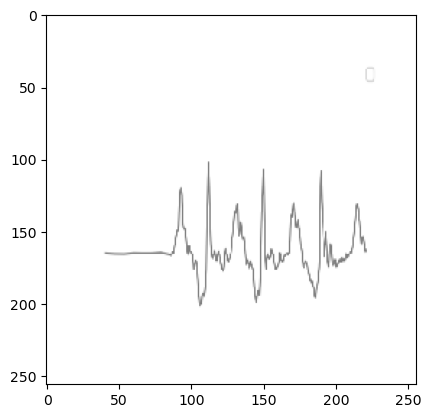

imagem: 112
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


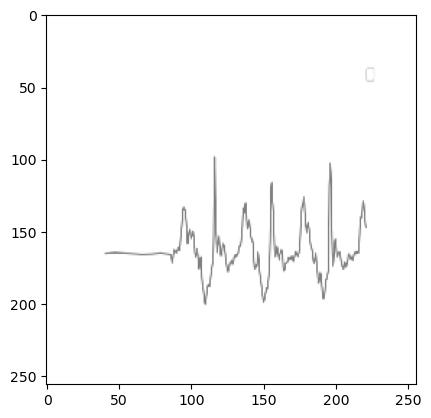

imagem: 113
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


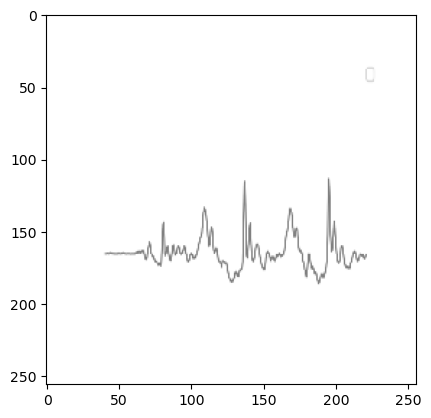

imagem: 114
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


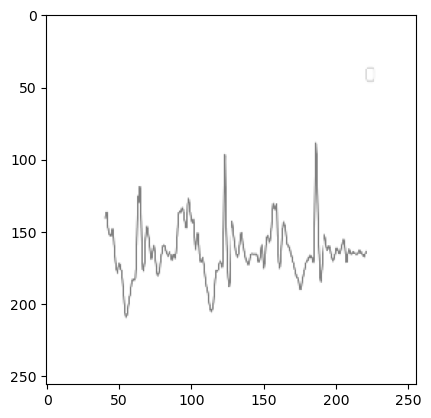

imagem: 115
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


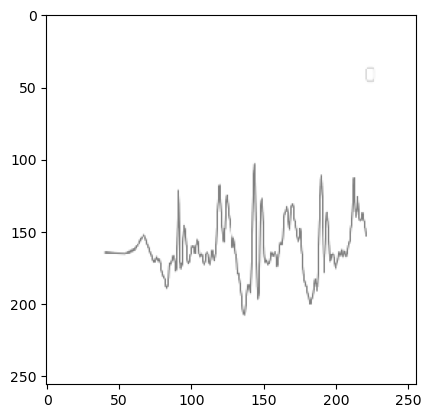

imagem: 116
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


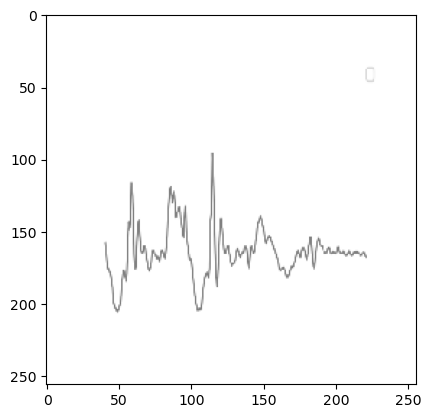

imagem: 117
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


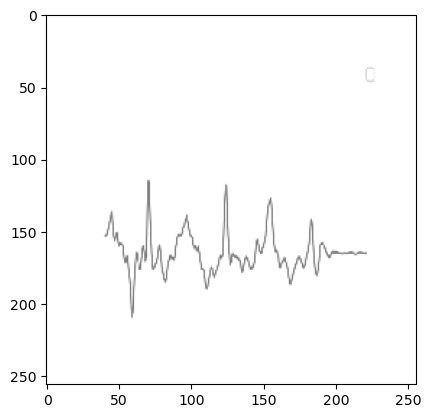

imagem: 118
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


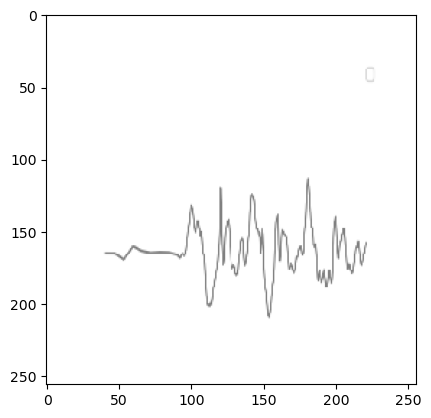

imagem: 119
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


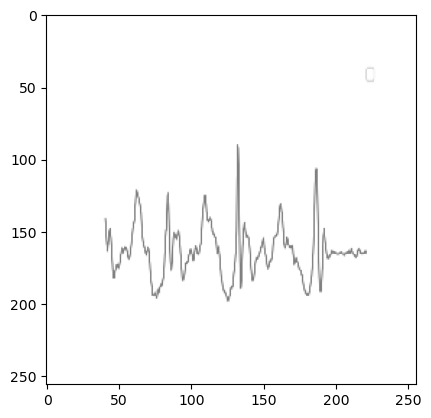

imagem: 120
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


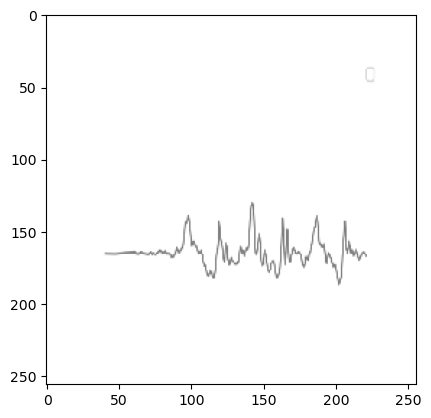

imagem: 121
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


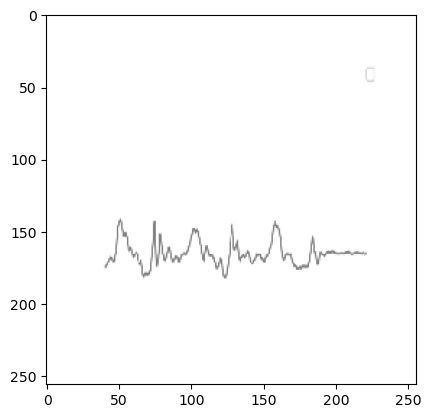

imagem: 122
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


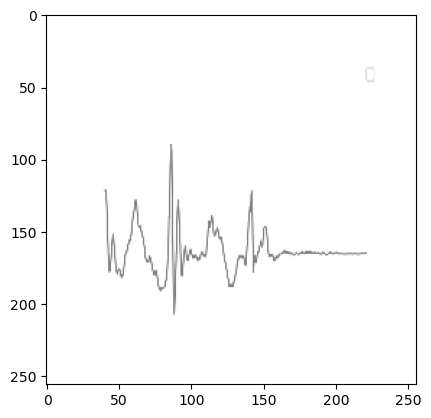

imagem: 123
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


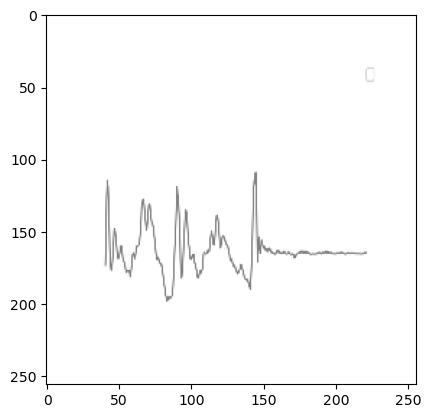

imagem: 124
label original:2
label previsto:[2]
1/1 [==============================] - 0s 22ms/step


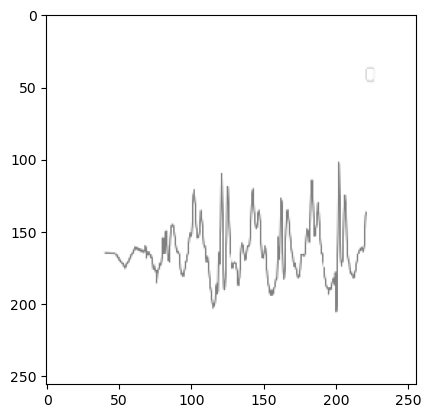

imagem: 125
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


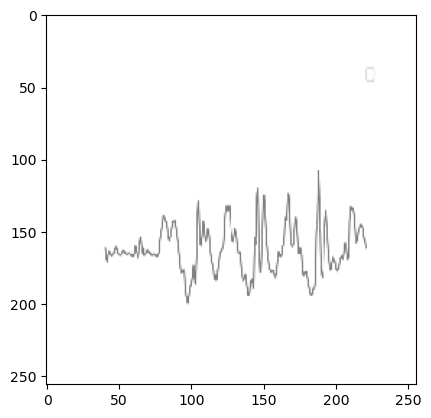

imagem: 126
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


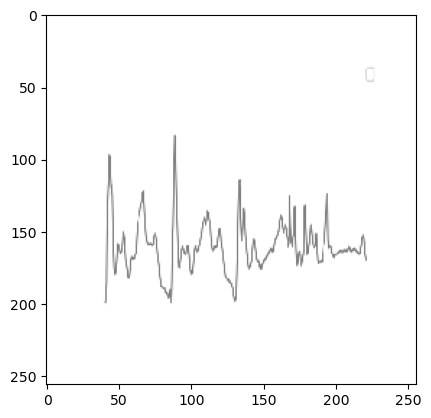

imagem: 127
label original:2
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


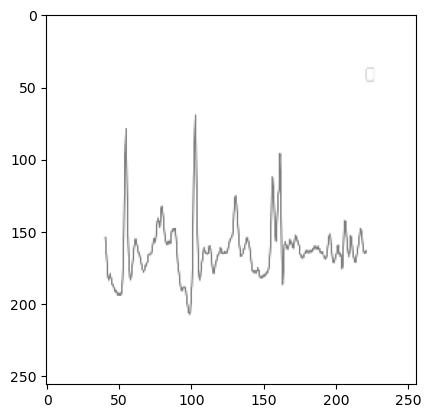

imagem: 128
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


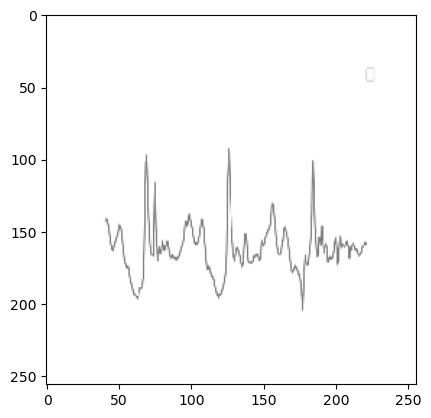

imagem: 129
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


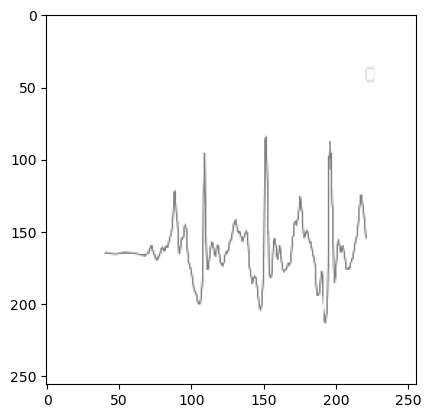

imagem: 130
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


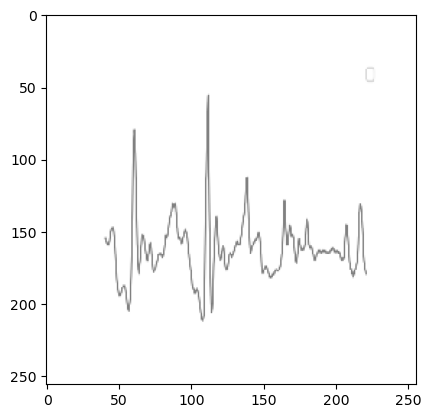

imagem: 131
label original:2
label previsto:[2]
1/1 [==============================] - 0s 21ms/step


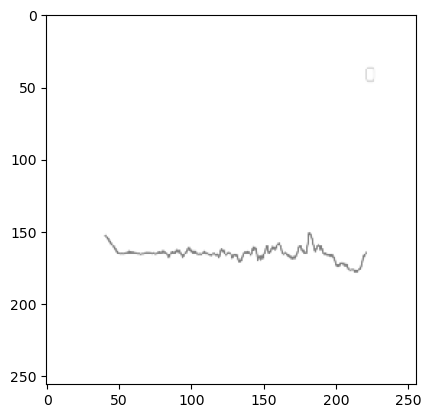

imagem: 132
label original:3
label previsto:[3]
1/1 [==============================] - 0s 21ms/step


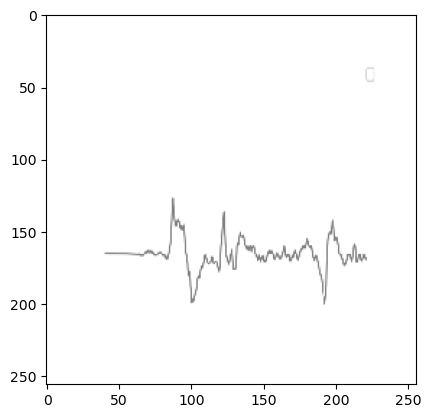

imagem: 133
label original:3
label previsto:[3]
1/1 [==============================] - 0s 21ms/step


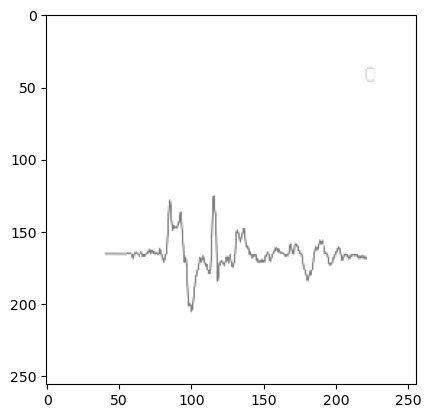

imagem: 134
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


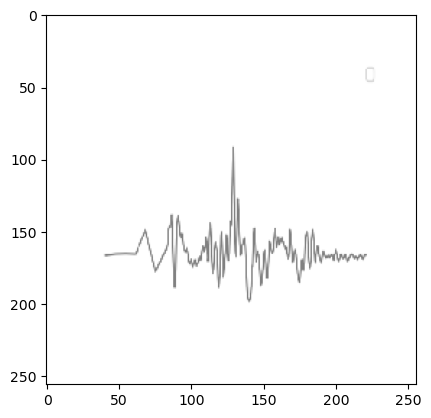

imagem: 135
label original:3
label previsto:[3]
1/1 [==============================] - 0s 21ms/step


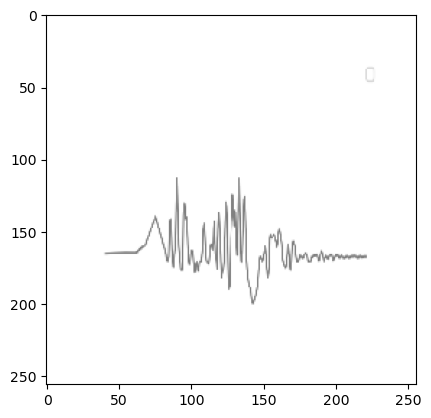

imagem: 136
label original:3
label previsto:[3]
1/1 [==============================] - 0s 21ms/step


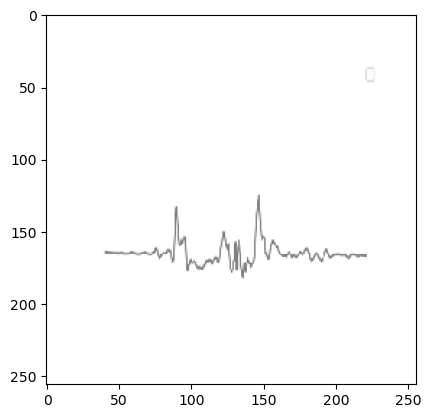

imagem: 137
label original:3
label previsto:[3]
1/1 [==============================] - 0s 22ms/step


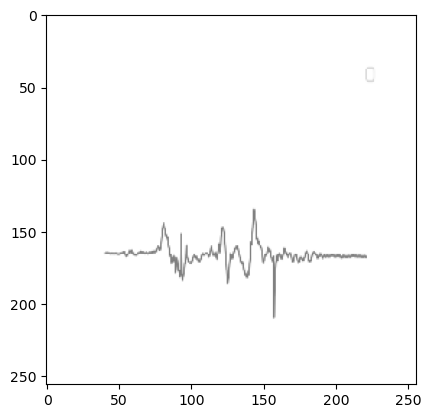

imagem: 138
label original:3
label previsto:[3]
1/1 [==============================] - 0s 22ms/step


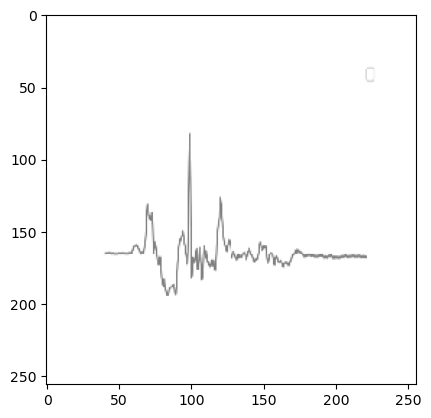

imagem: 139
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


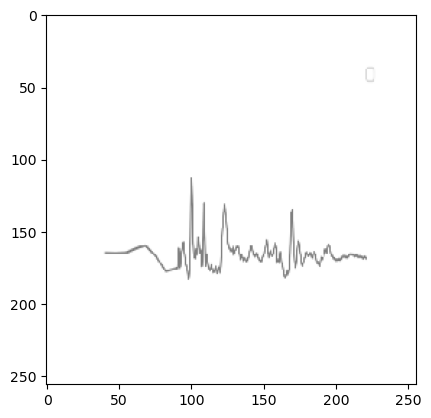

imagem: 140
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


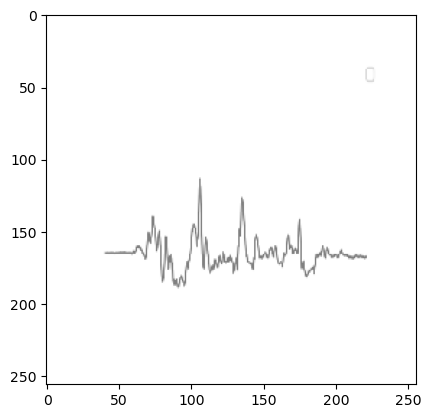

imagem: 141
label original:3
label previsto:[3]
1/1 [==============================] - 0s 21ms/step


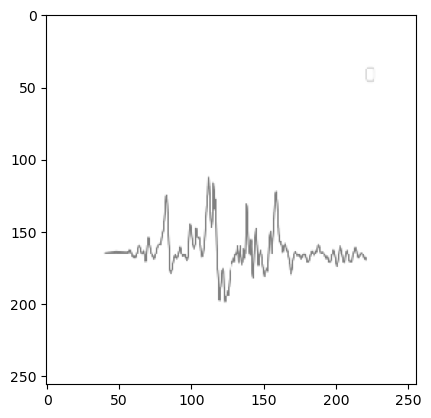

imagem: 142
label original:3
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


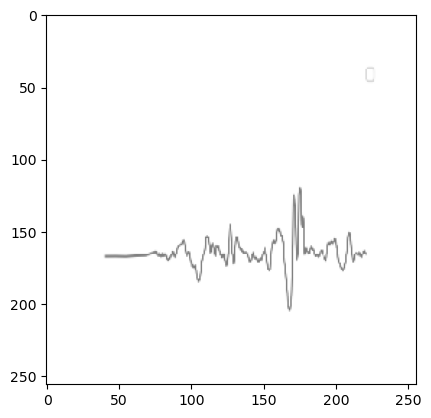

imagem: 143
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


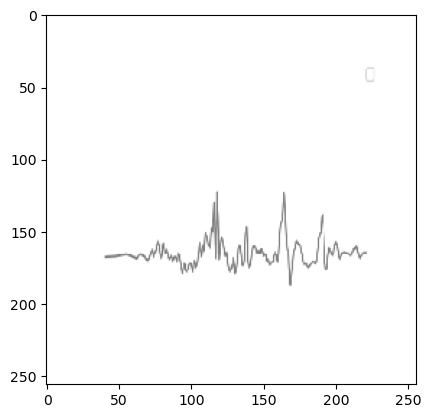

imagem: 144
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


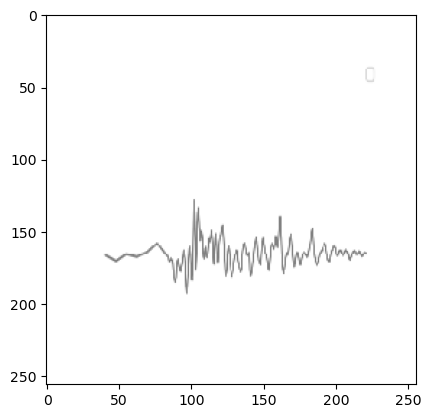

imagem: 145
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


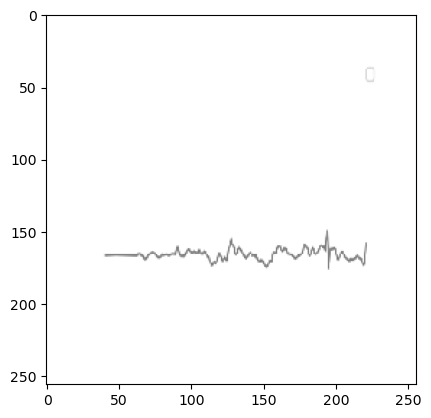

imagem: 146
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


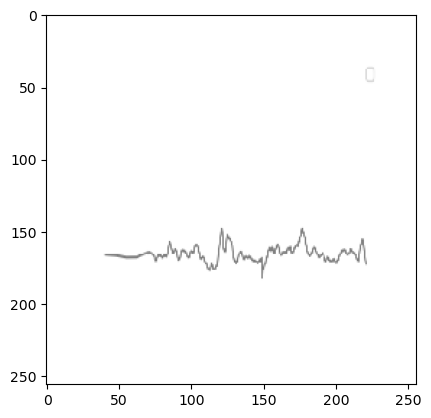

imagem: 147
label original:3
label previsto:[3]
1/1 [==============================] - 0s 21ms/step


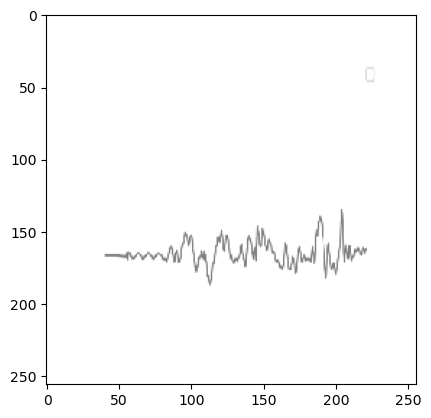

imagem: 148
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


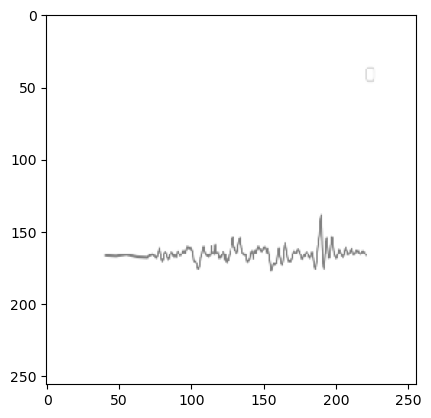

imagem: 149
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


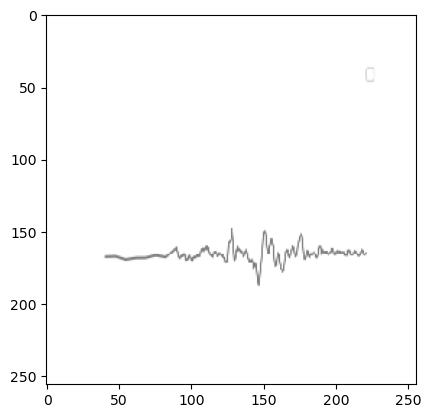

imagem: 150
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


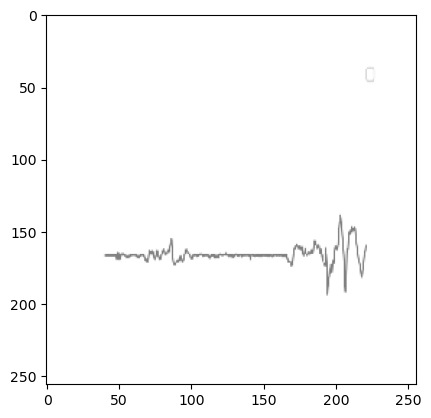

imagem: 151
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


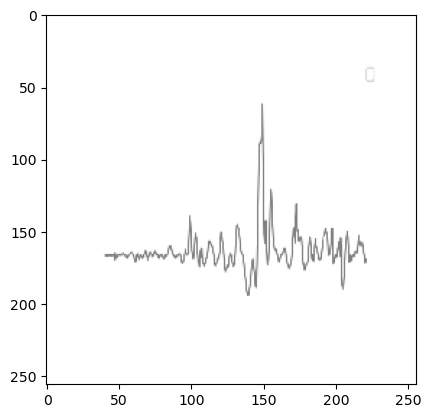

imagem: 152
label original:3
label previsto:[3]
1/1 [==============================] - 0s 20ms/step


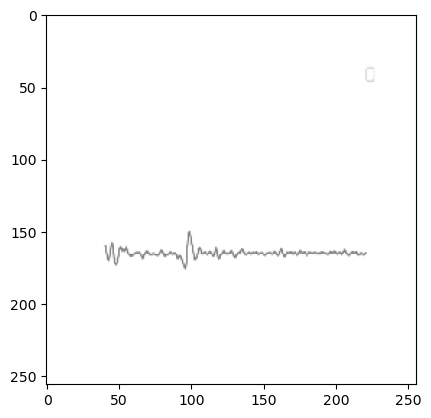

imagem: 153
label original:4
label previsto:[7]
1/1 [==============================] - 0s 21ms/step


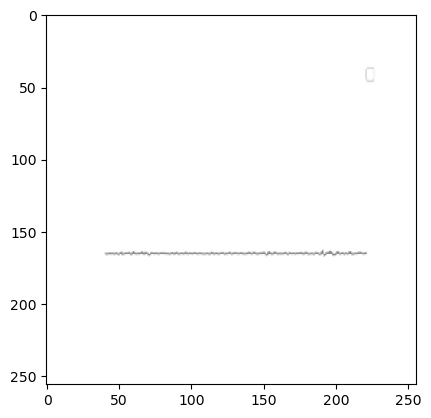

imagem: 154
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


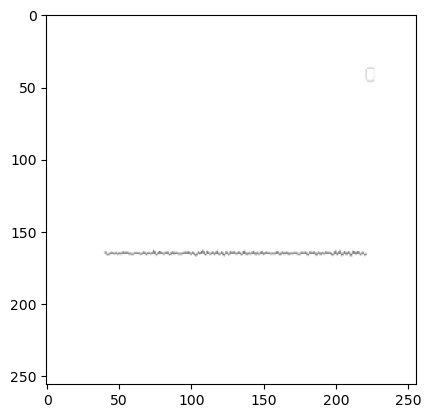

imagem: 155
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


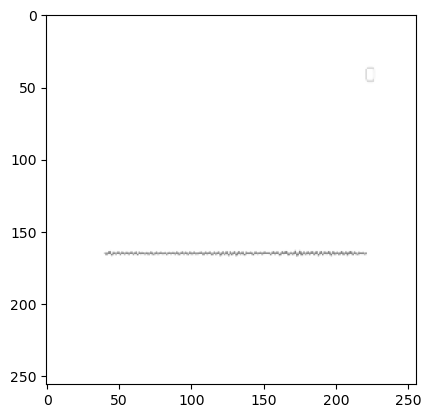

imagem: 156
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


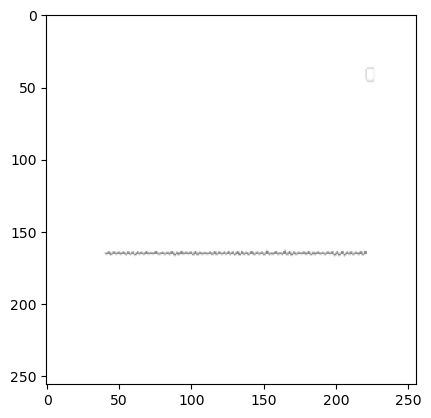

imagem: 157
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


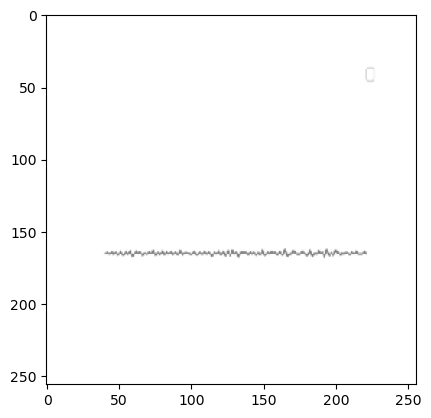

imagem: 158
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


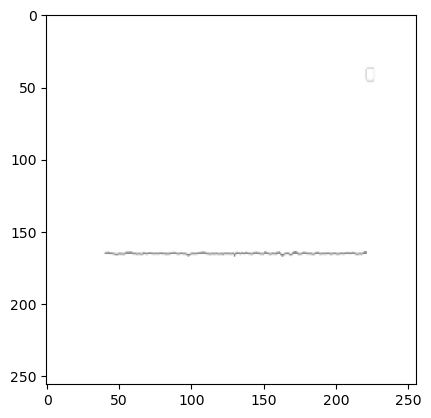

imagem: 159
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


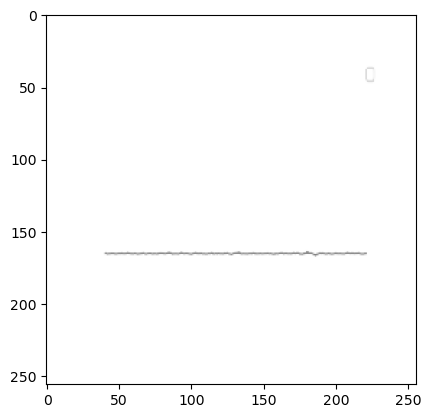

imagem: 160
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


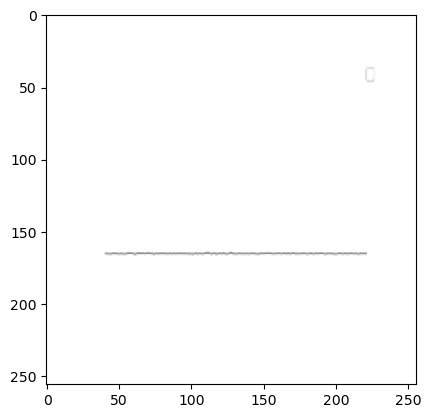

imagem: 161
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


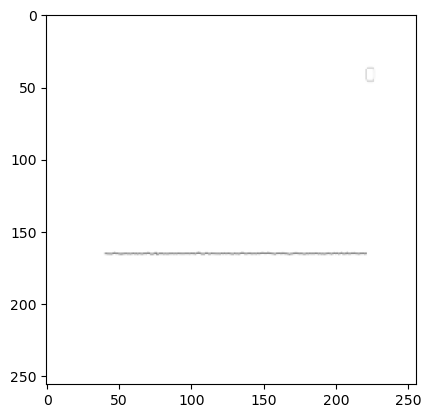

imagem: 162
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


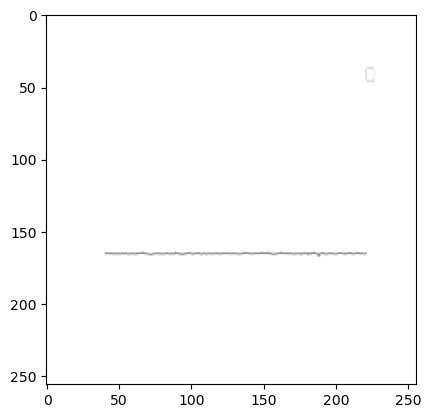

imagem: 163
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


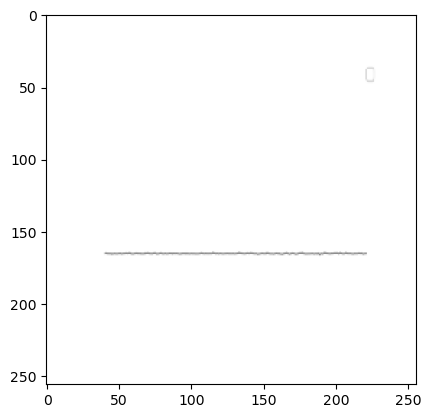

imagem: 164
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


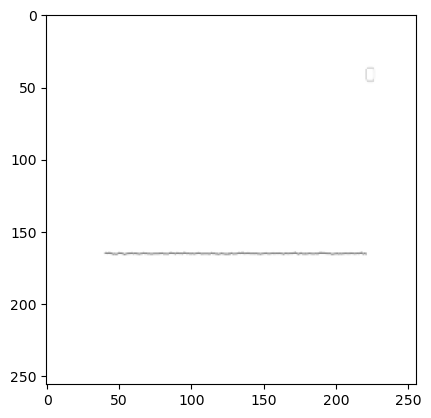

imagem: 165
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


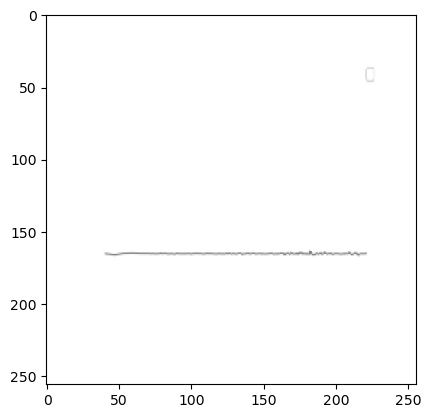

imagem: 166
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


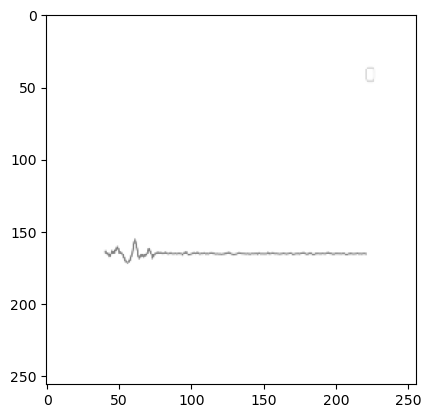

imagem: 167
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


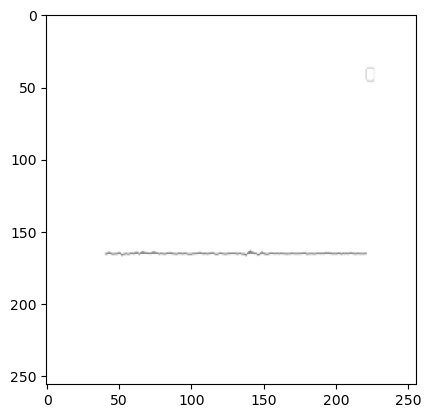

imagem: 168
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


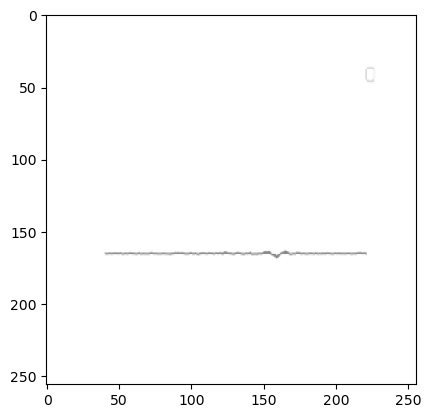

imagem: 169
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


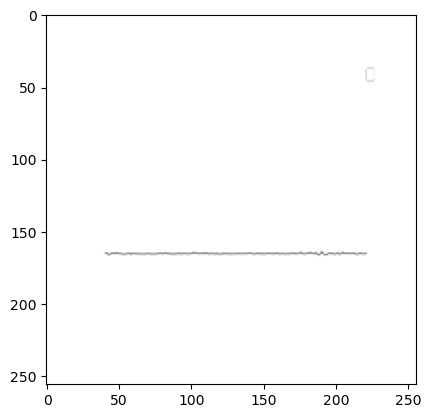

imagem: 170
label original:4
label previsto:[4]
1/1 [==============================] - 0s 22ms/step


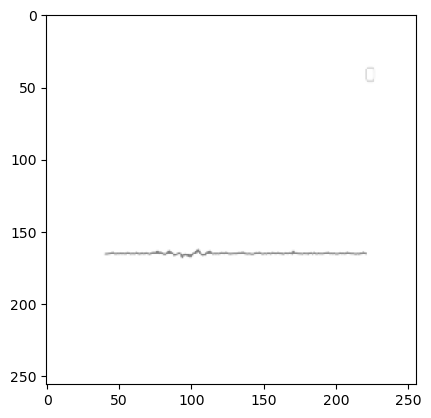

imagem: 171
label original:4
label previsto:[4]
1/1 [==============================] - 0s 22ms/step


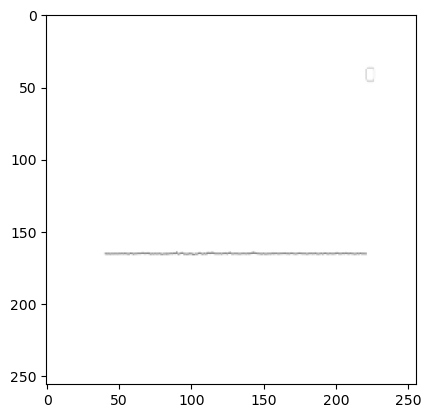

imagem: 172
label original:4
label previsto:[4]
1/1 [==============================] - 0s 22ms/step


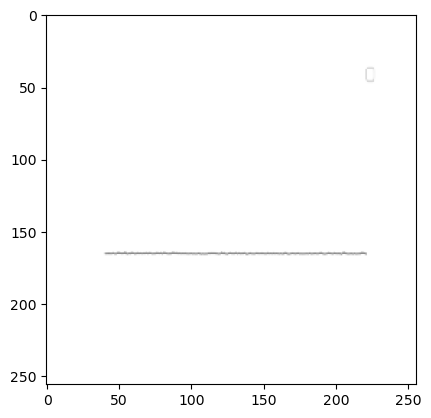

imagem: 173
label original:4
label previsto:[4]
1/1 [==============================] - 0s 23ms/step


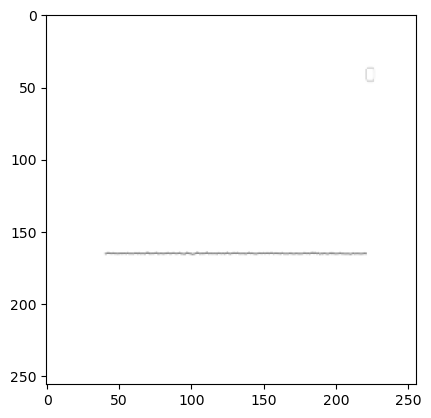

imagem: 174
label original:4
label previsto:[4]
1/1 [==============================] - 0s 23ms/step


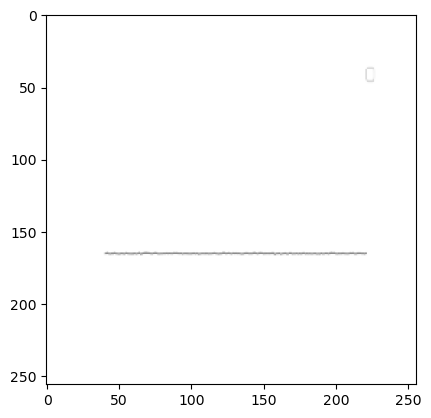

imagem: 175
label original:4
label previsto:[4]
1/1 [==============================] - 0s 23ms/step


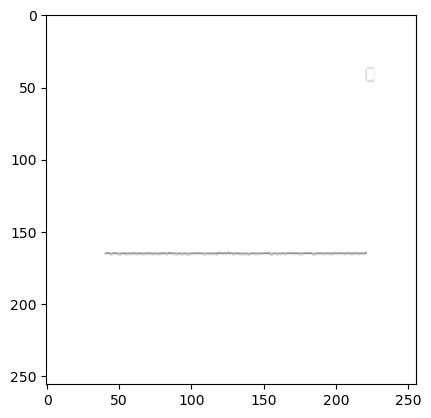

imagem: 176
label original:4
label previsto:[4]
1/1 [==============================] - 0s 22ms/step


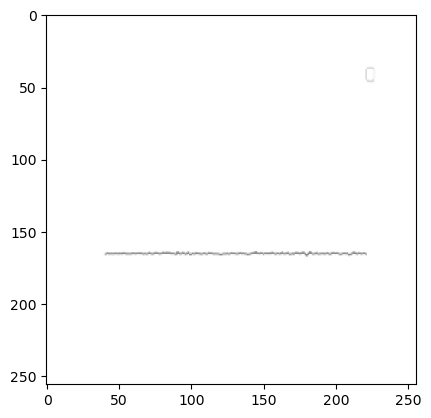

imagem: 177
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


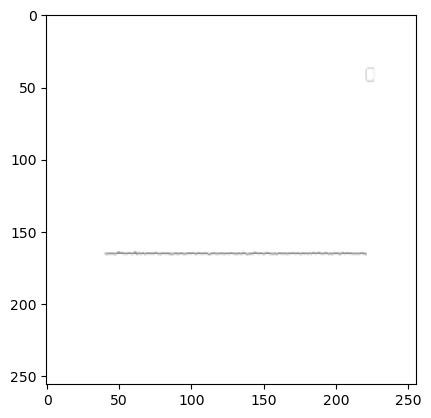

imagem: 178
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


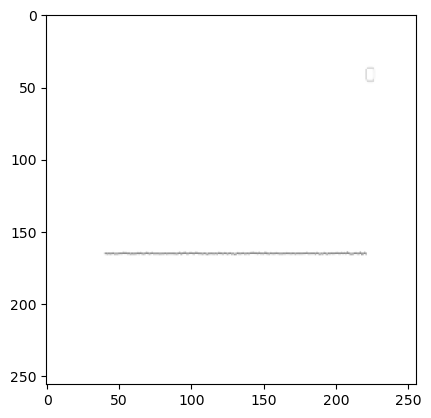

imagem: 179
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


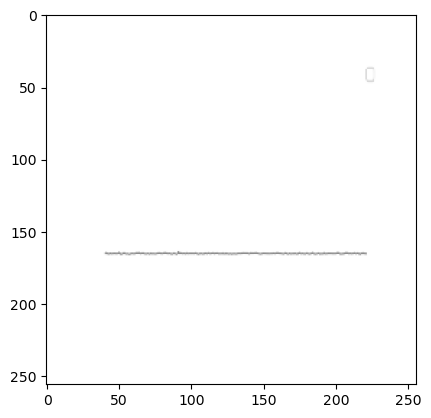

imagem: 180
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


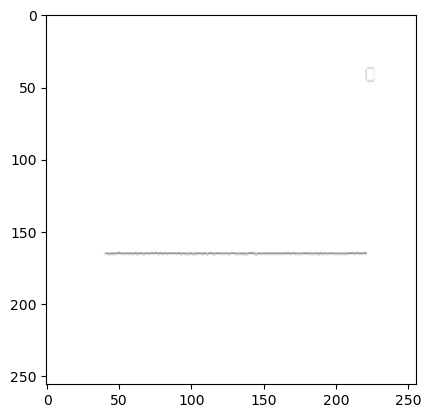

imagem: 181
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


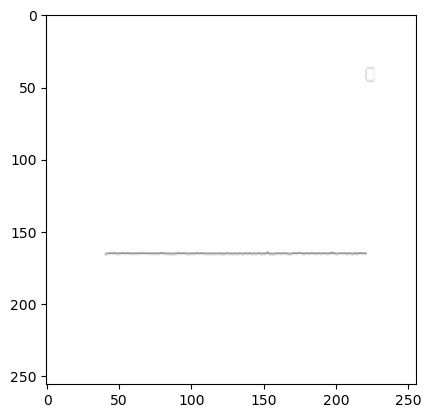

imagem: 182
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


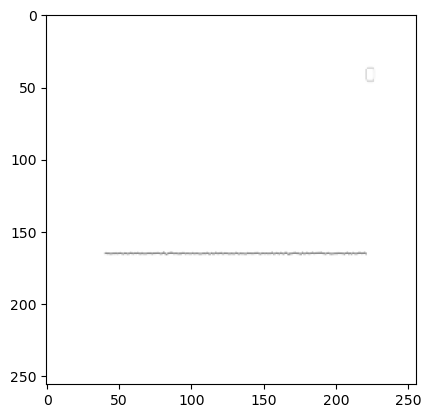

imagem: 183
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


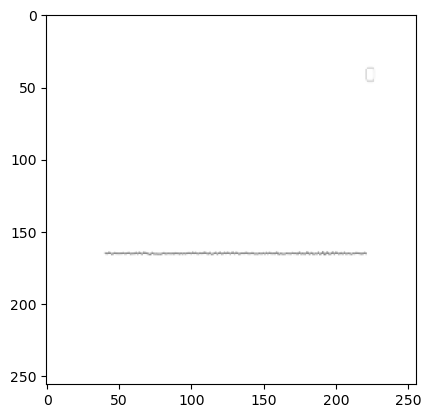

imagem: 184
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


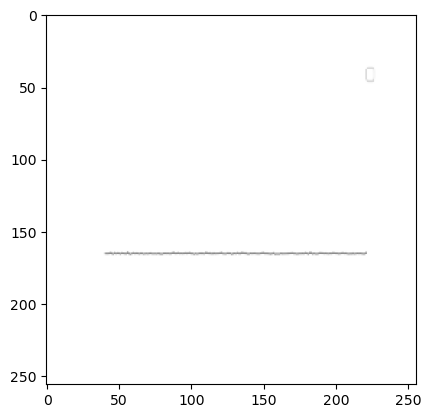

imagem: 185
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


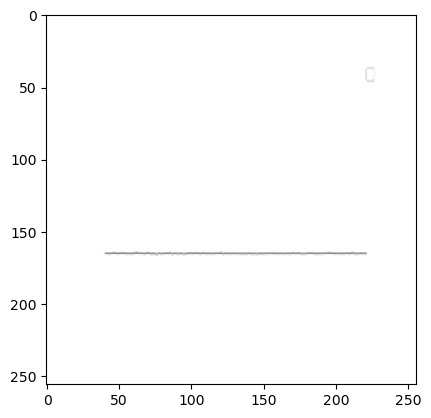

imagem: 186
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


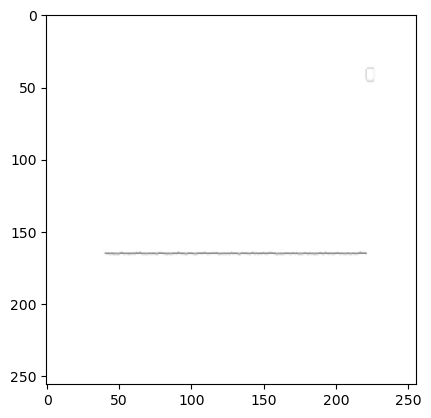

imagem: 187
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


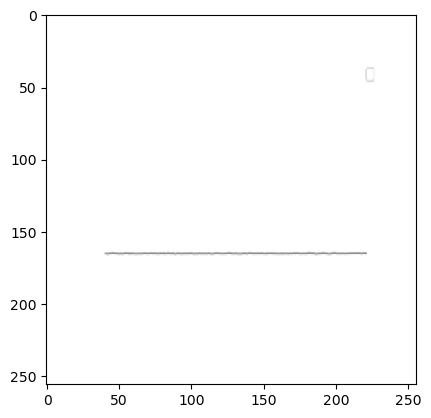

imagem: 188
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


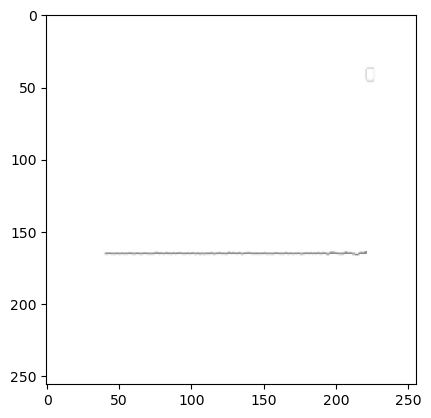

imagem: 189
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


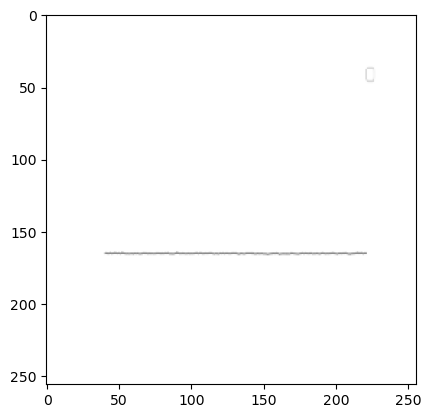

imagem: 190
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


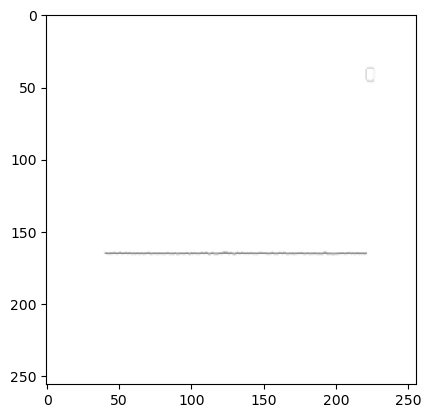

imagem: 191
label original:4
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


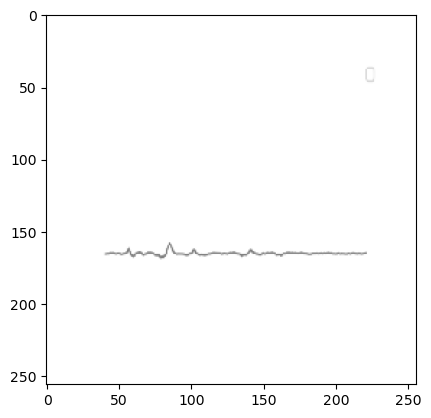

imagem: 192
label original:4
label previsto:[4]
1/1 [==============================] - 0s 20ms/step


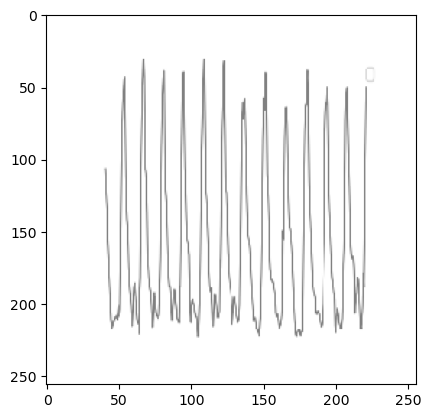

imagem: 193
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


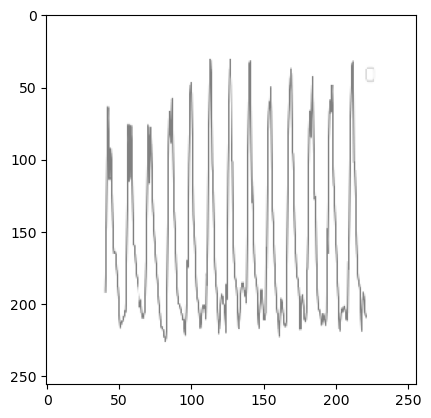

imagem: 194
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


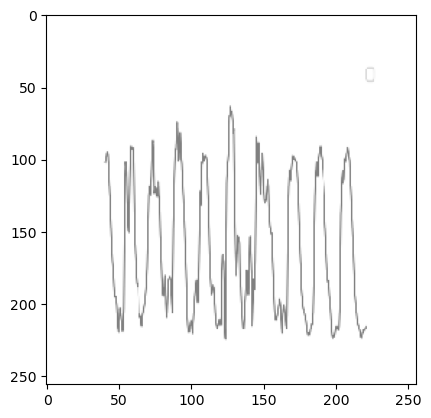

imagem: 195
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


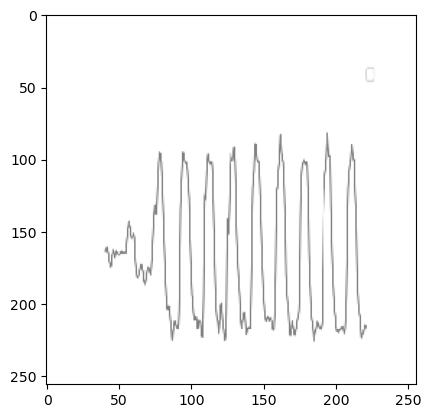

imagem: 196
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


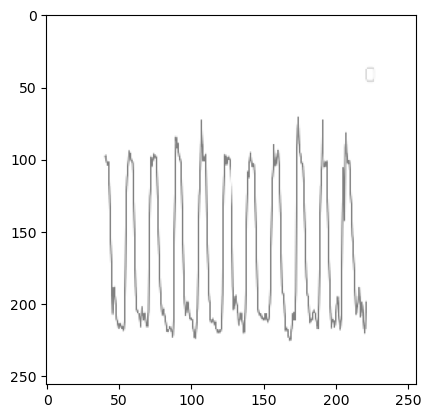

imagem: 197
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


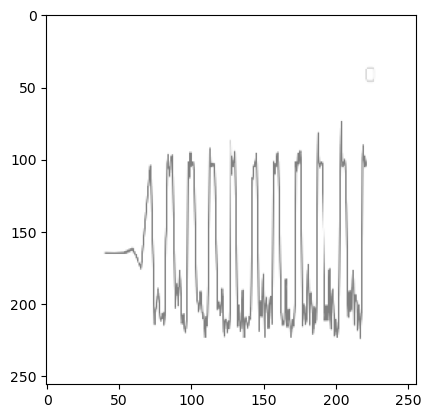

imagem: 198
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


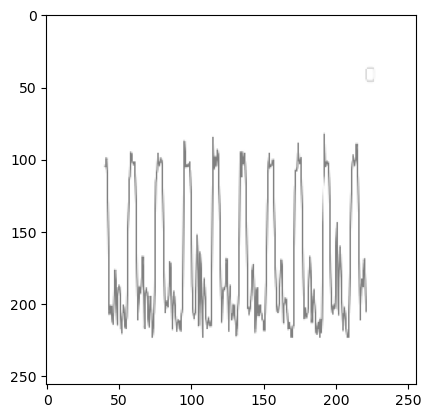

imagem: 199
label original:5
label previsto:[5]
1/1 [==============================] - 0s 22ms/step


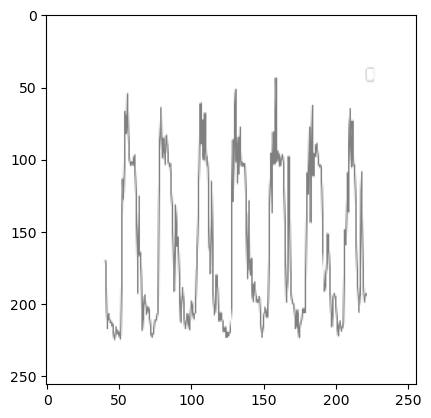

imagem: 200
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


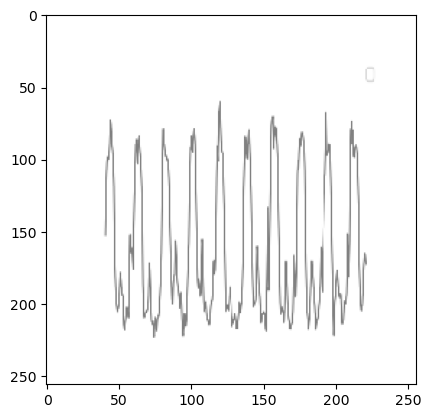

imagem: 201
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


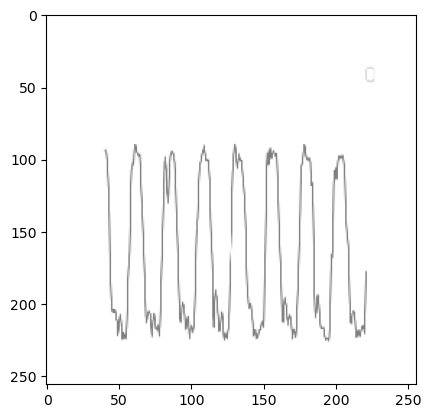

imagem: 202
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


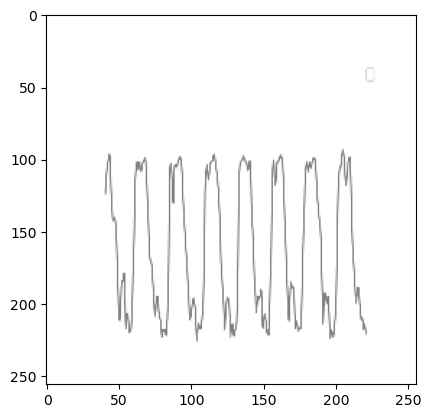

imagem: 203
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


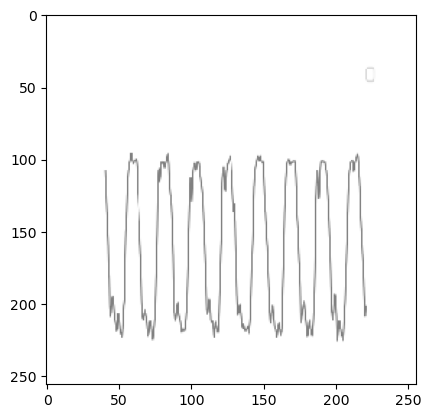

imagem: 204
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


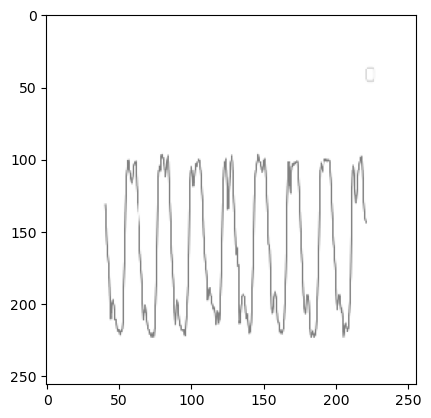

imagem: 205
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


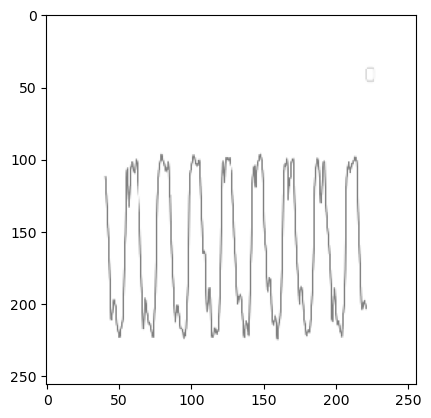

imagem: 206
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


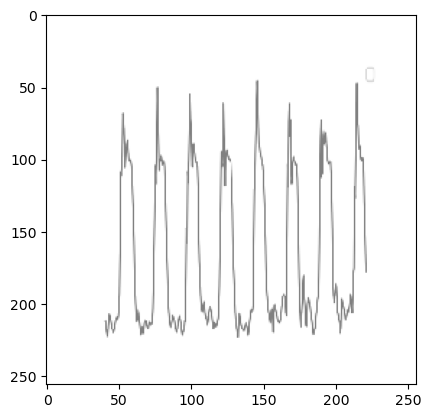

imagem: 207
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


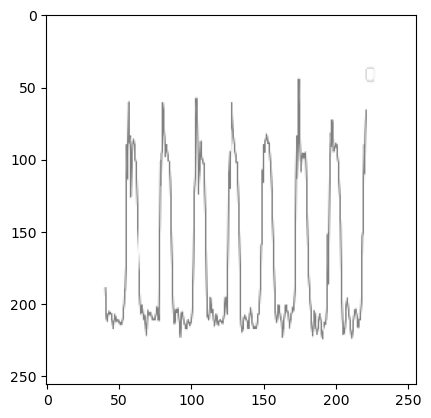

imagem: 208
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


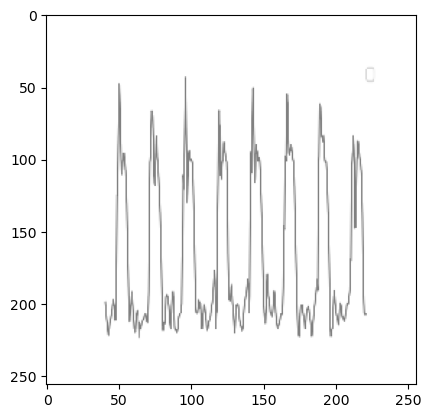

imagem: 209
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


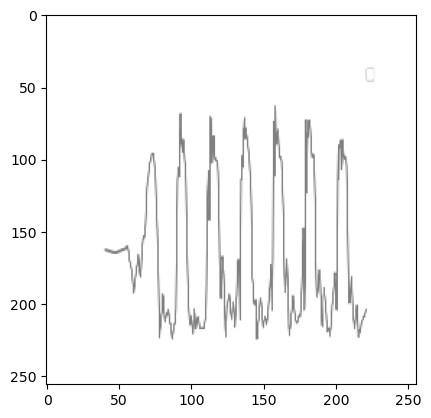

imagem: 210
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


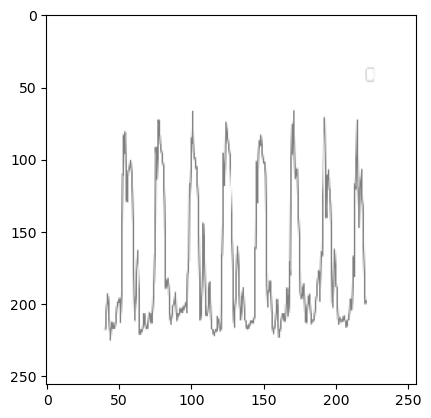

imagem: 211
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


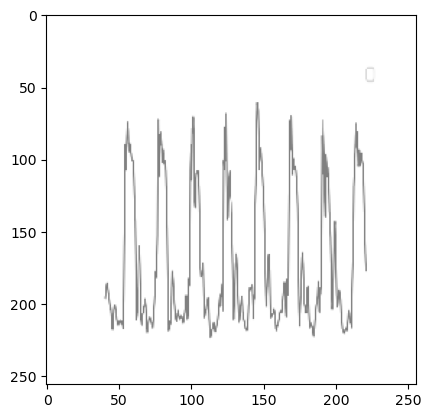

imagem: 212
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


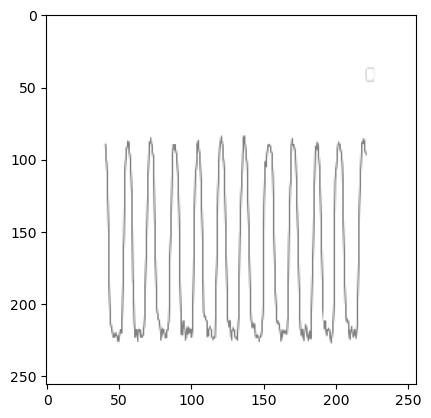

imagem: 213
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


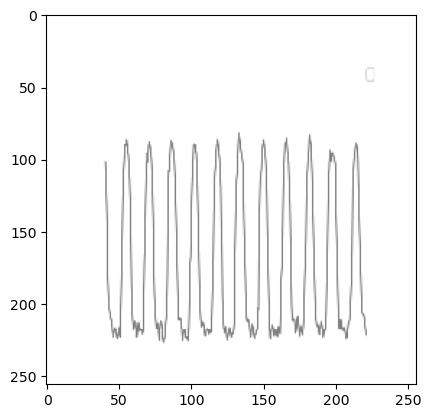

imagem: 214
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


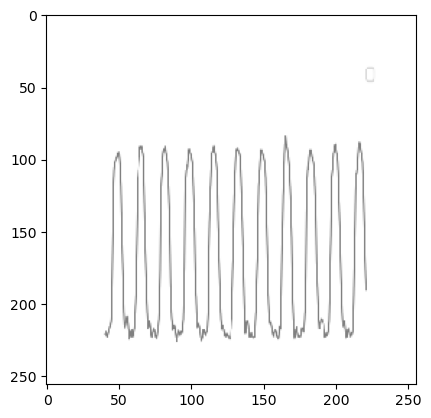

imagem: 215
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


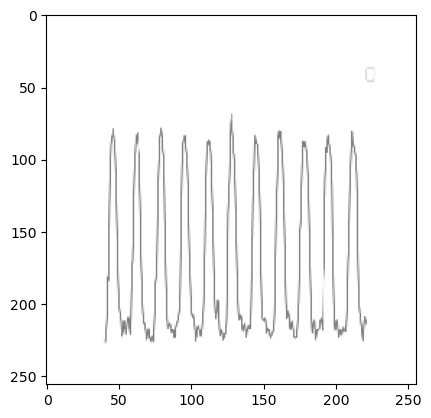

imagem: 216
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


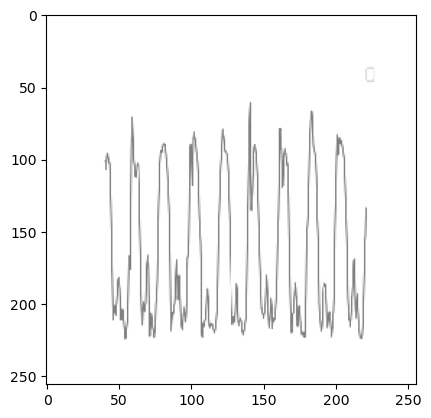

imagem: 217
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


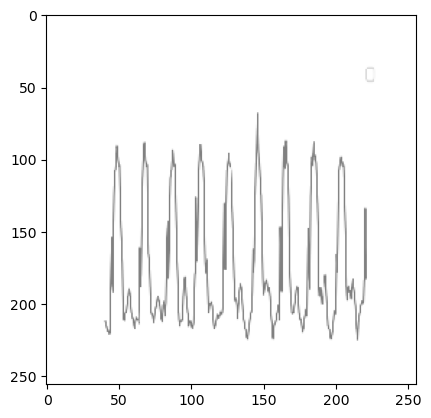

imagem: 218
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


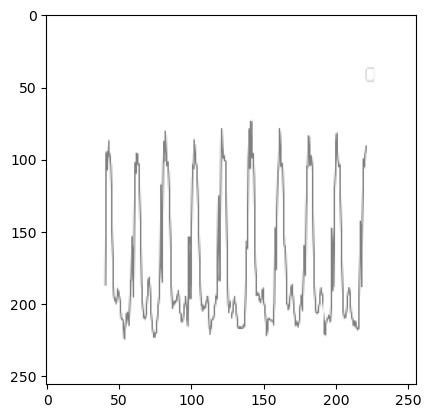

imagem: 219
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


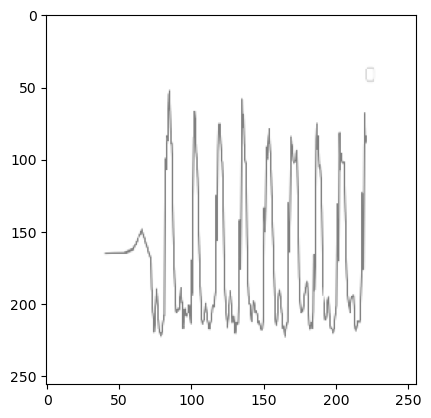

imagem: 220
label original:5
label previsto:[5]
1/1 [==============================] - 0s 20ms/step


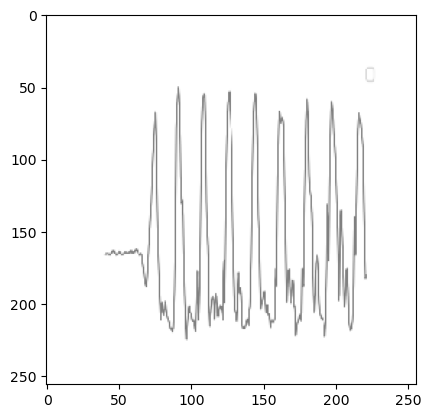

imagem: 221
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


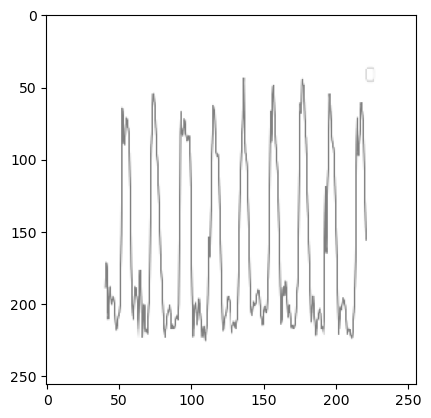

imagem: 222
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


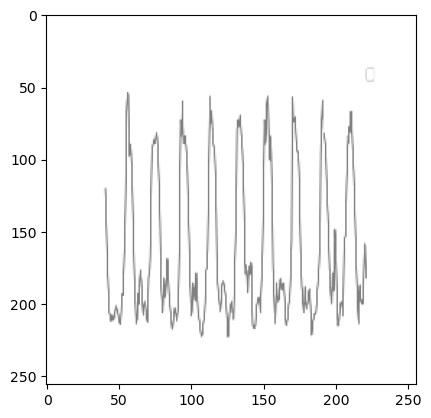

imagem: 223
label original:5
label previsto:[5]
1/1 [==============================] - 0s 21ms/step


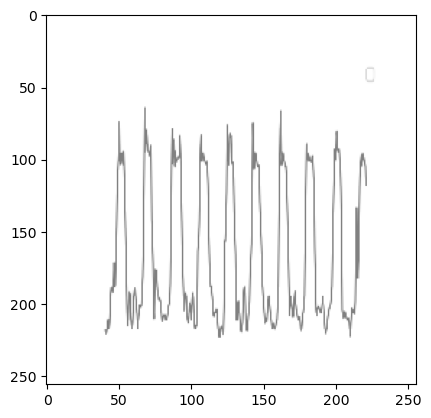

imagem: 224
label original:5
label previsto:[5]
1/1 [==============================] - 0s 22ms/step


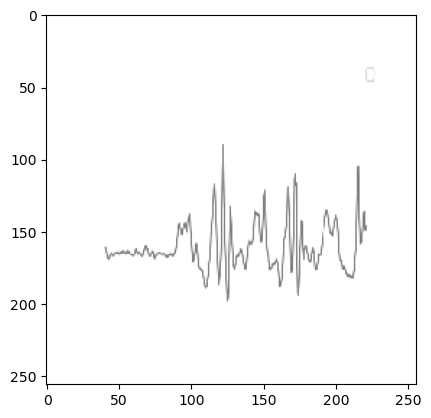

imagem: 225
label original:6
label previsto:[2]
1/1 [==============================] - 0s 20ms/step


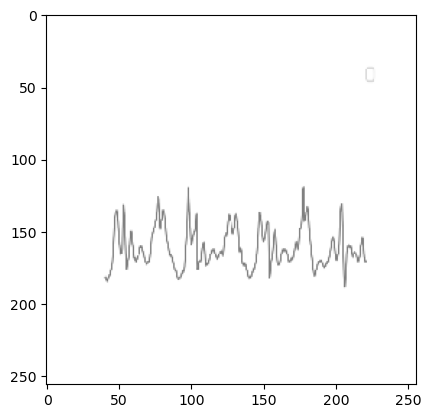

imagem: 226
label original:6
label previsto:[6]
1/1 [==============================] - 0s 22ms/step


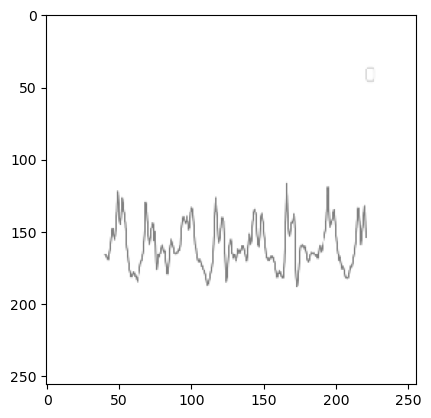

imagem: 227
label original:6
label previsto:[6]
1/1 [==============================] - 0s 23ms/step


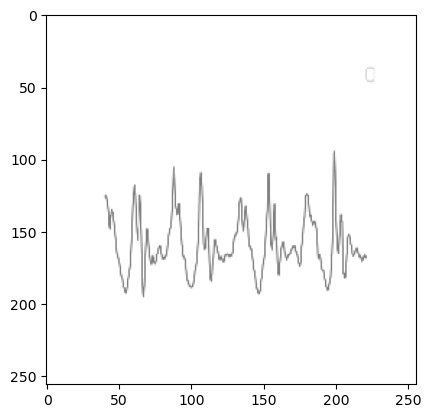

imagem: 228
label original:6
label previsto:[6]
1/1 [==============================] - 0s 22ms/step


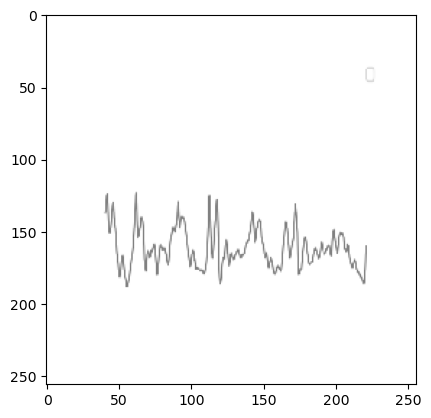

imagem: 229
label original:6
label previsto:[2]
1/1 [==============================] - 0s 23ms/step


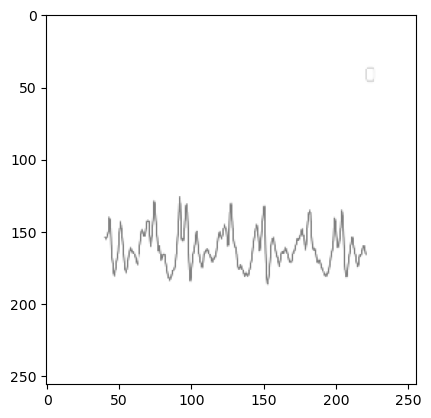

imagem: 230
label original:6
label previsto:[6]
1/1 [==============================] - 0s 22ms/step


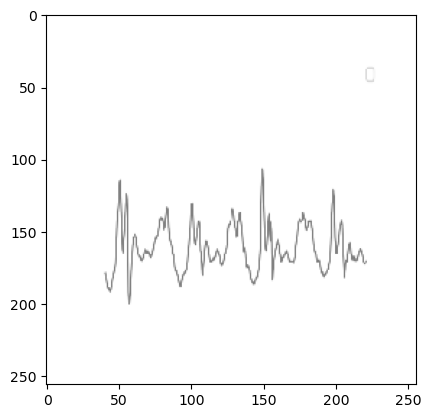

imagem: 231
label original:6
label previsto:[6]
1/1 [==============================] - 0s 23ms/step


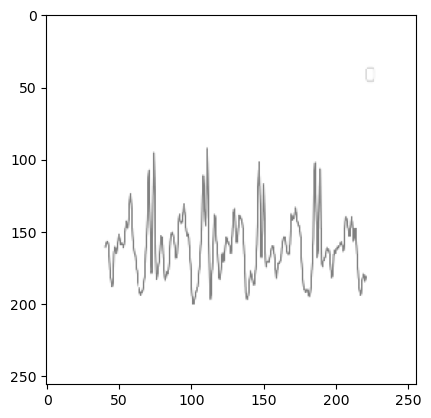

imagem: 232
label original:6
label previsto:[6]
1/1 [==============================] - 0s 22ms/step


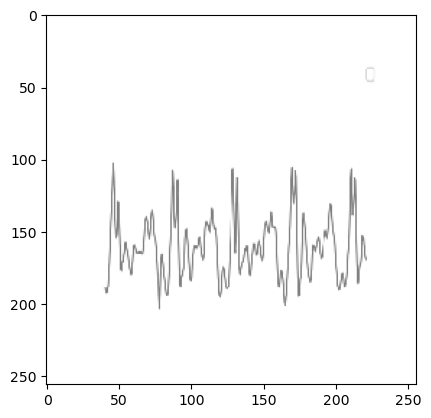

imagem: 233
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


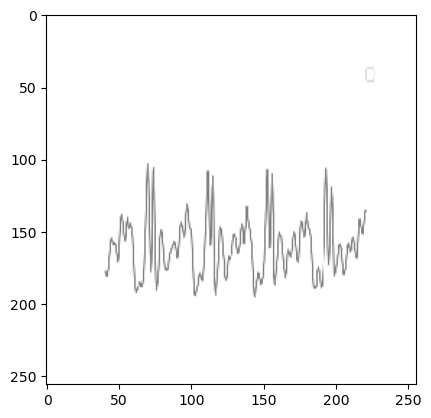

imagem: 234
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


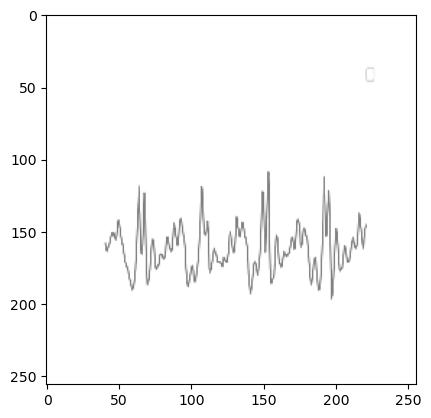

imagem: 235
label original:6
label previsto:[6]
1/1 [==============================] - 0s 22ms/step


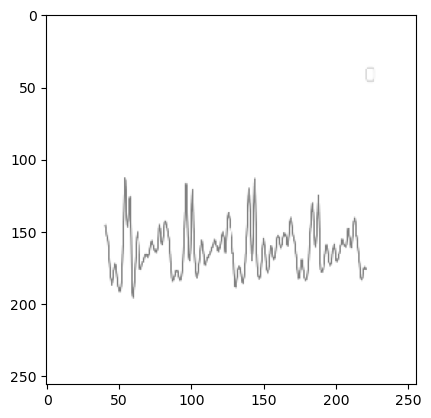

imagem: 236
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


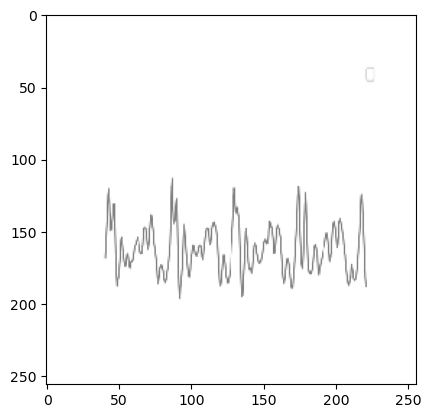

imagem: 237
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


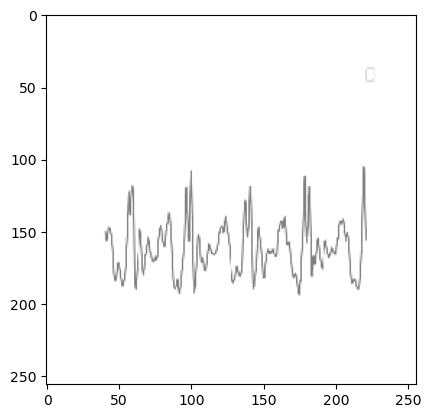

imagem: 238
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


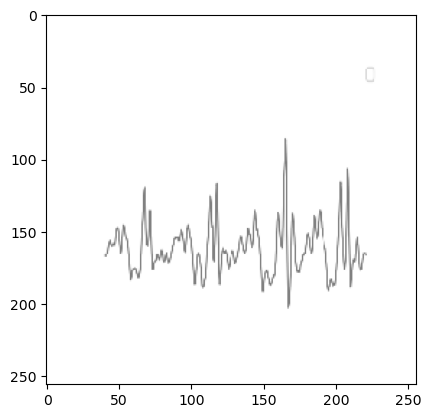

imagem: 239
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


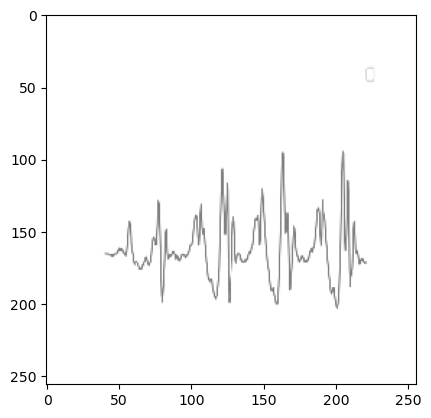

imagem: 240
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


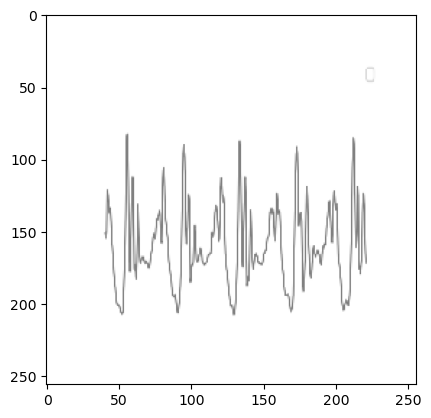

imagem: 241
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


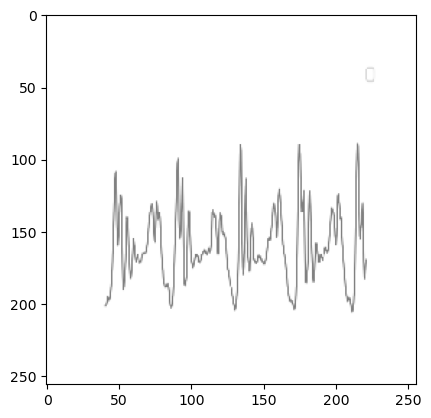

imagem: 242
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


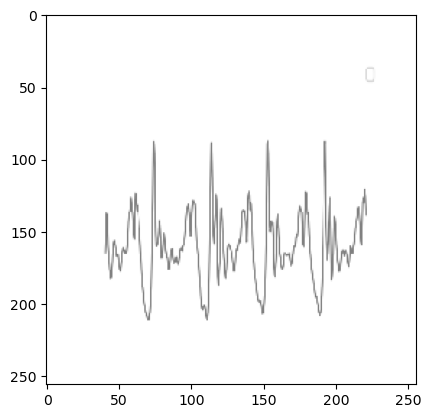

imagem: 243
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


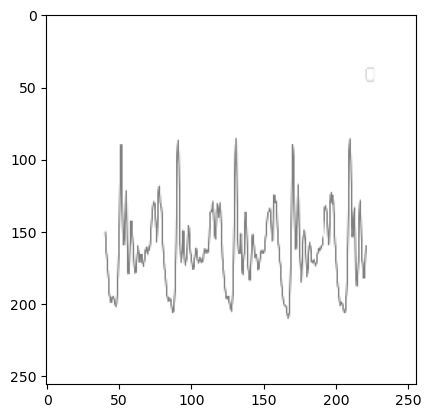

imagem: 244
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


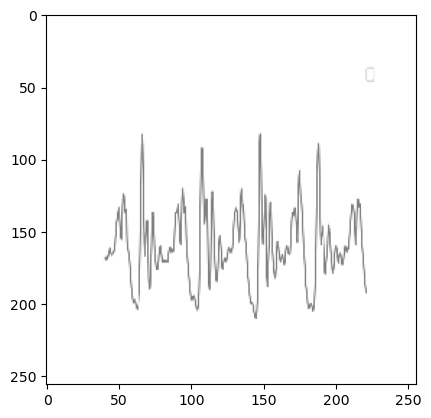

imagem: 245
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


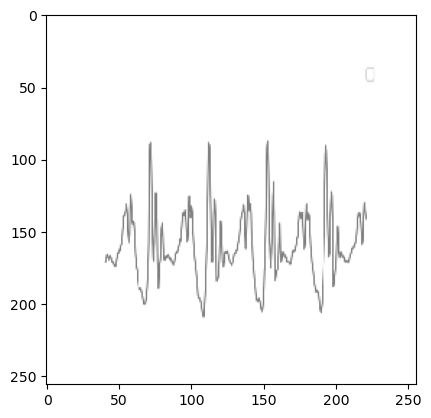

imagem: 246
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


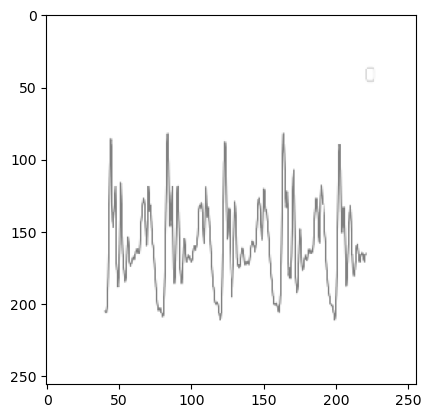

imagem: 247
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


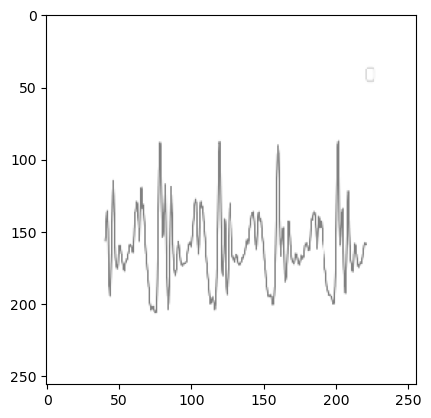

imagem: 248
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


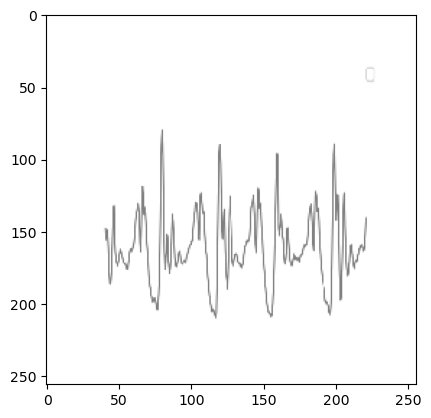

imagem: 249
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


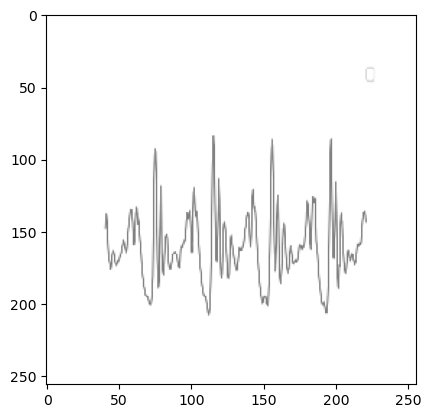

imagem: 250
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


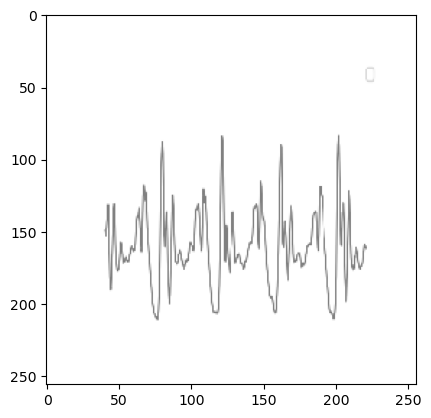

imagem: 251
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


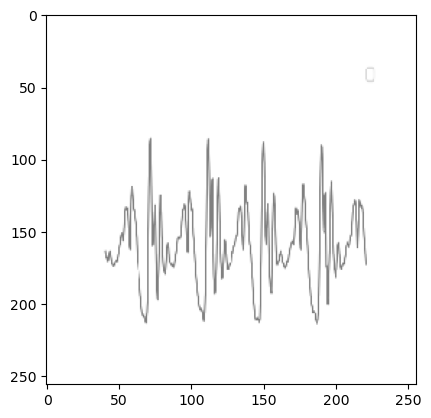

imagem: 252
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


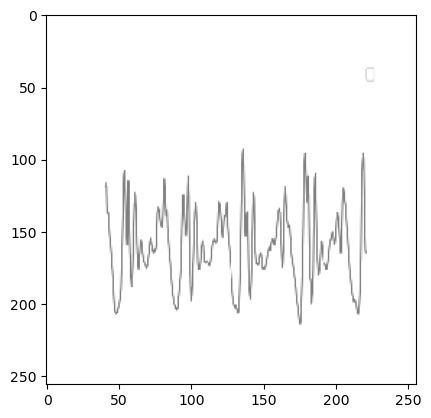

imagem: 253
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


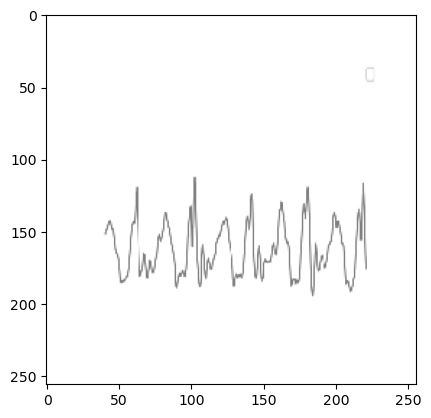

imagem: 254
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


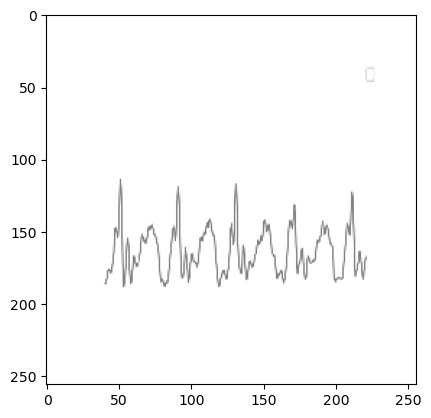

imagem: 255
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


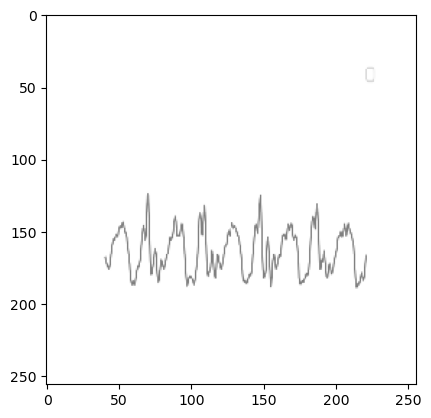

imagem: 256
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


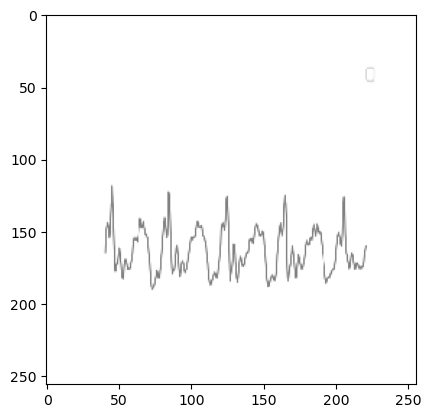

imagem: 257
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


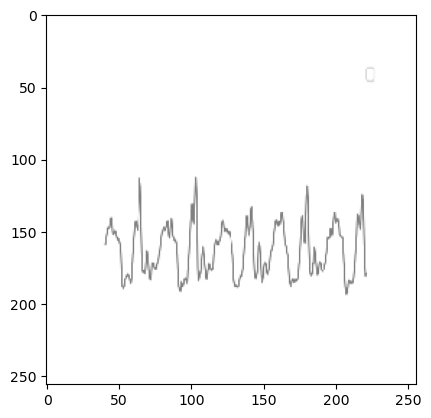

imagem: 258
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


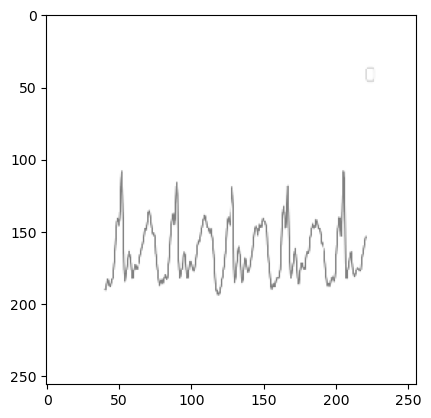

imagem: 259
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


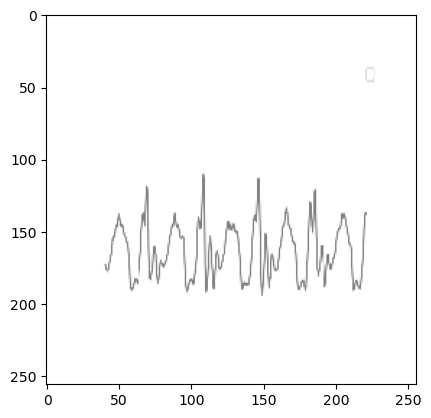

imagem: 260
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


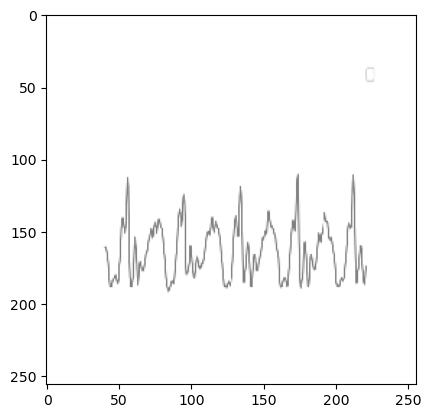

imagem: 261
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


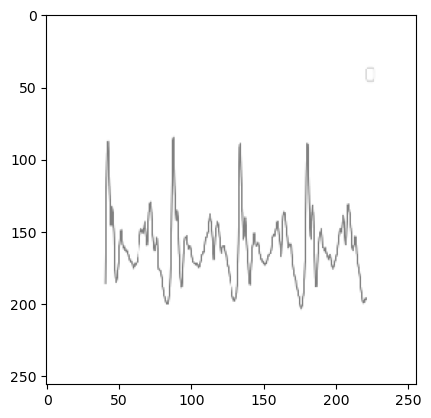

imagem: 262
label original:6
label previsto:[6]
1/1 [==============================] - 0s 21ms/step


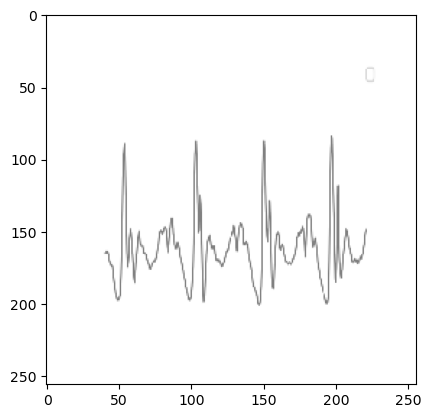

imagem: 263
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


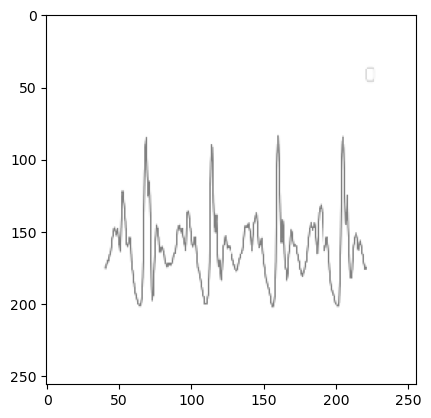

imagem: 264
label original:6
label previsto:[6]
1/1 [==============================] - 0s 20ms/step


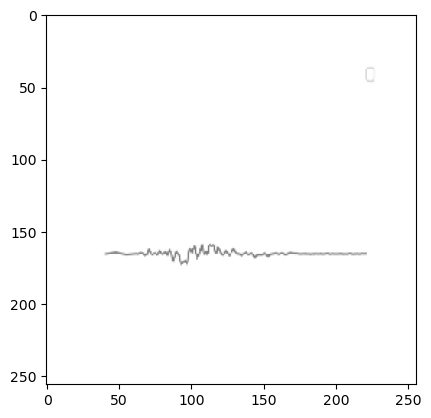

imagem: 265
label original:7
label previsto:[4]
1/1 [==============================] - 0s 21ms/step


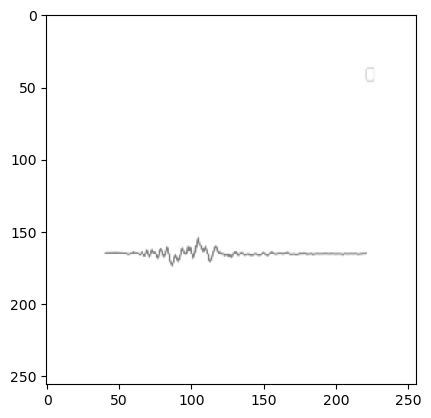

imagem: 266
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


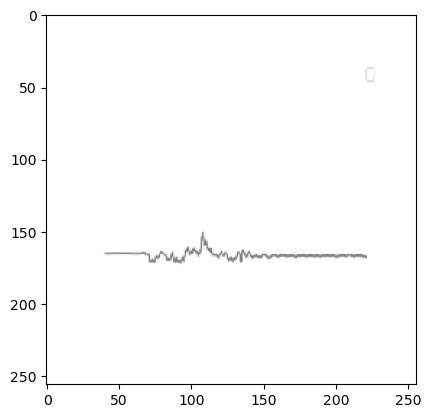

imagem: 267
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


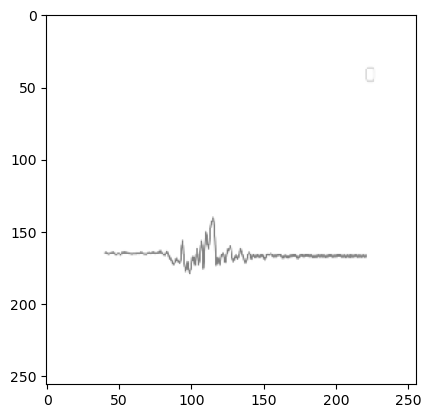

imagem: 268
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


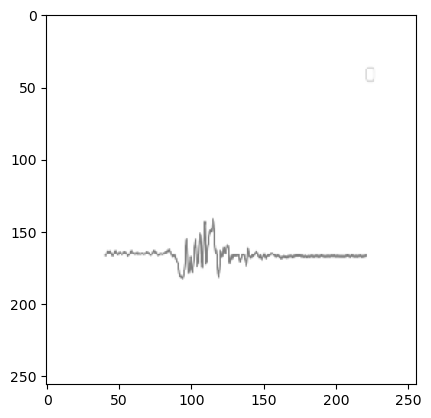

imagem: 269
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


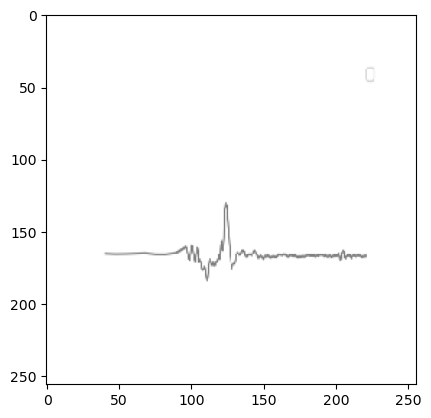

imagem: 270
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


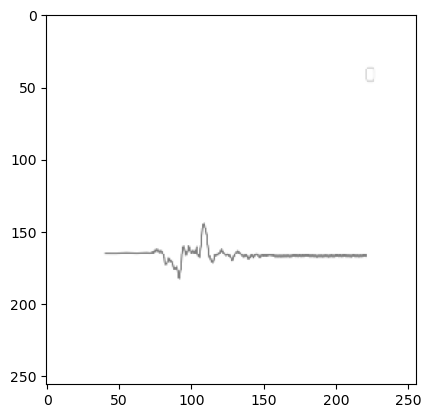

imagem: 271
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


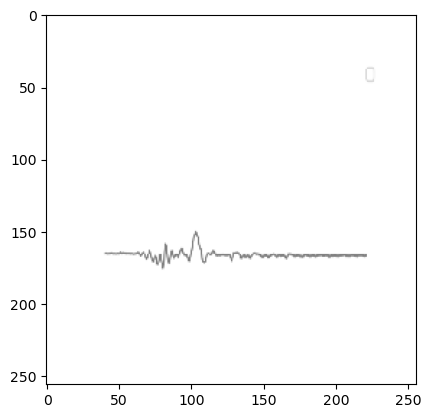

imagem: 272
label original:7
label previsto:[7]
1/1 [==============================] - 0s 20ms/step


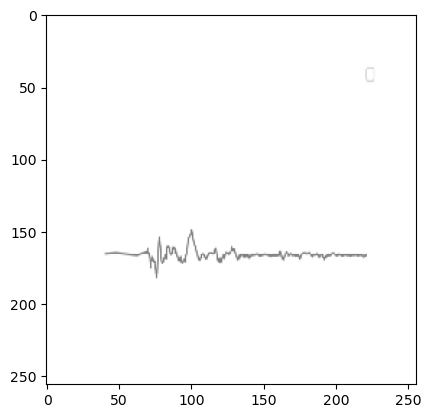

imagem: 273
label original:7
label previsto:[7]
1/1 [==============================] - 0s 22ms/step


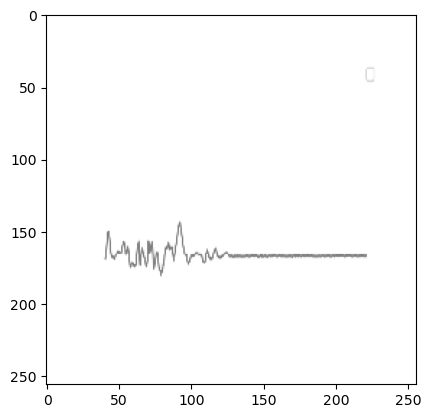

imagem: 274
label original:7
label previsto:[7]


In [6]:
label_original = []
label_previsto = []

cont = 0
for images,labels in test_generator:
    
        imagem = images[0]
        imagem_label = np.argmax(labels[0])
        imagem_redimensionada = np.expand_dims(imagem, axis=0)  
        previsao = modelo.predict(imagem_redimensionada)
        classe = np.argmax(previsao, axis=-1) 
        
   
        label_original.append(imagem_label)
        label_previsto.append(classe[0])
        
        plt.imshow(imagem)
        plt.show()
        print(f'imagem: {cont}')
        print(f'label original:{imagem_label}')
        print(f'label previsto:{classe}')
        cont += 1
     
        if cont == 275:
            break
        
        
    

        
     
        
    

In [7]:
print(label_original.count(0))
print(label_original.count(1))
print(label_original.count(2))
print(label_original.count(3))
print(label_original.count(4))
print(label_original.count(5))
print(label_original.count(6))
print(label_original.count(7))


57
32
43
21
40
32
40
10


In [8]:
import pandas as pd

comp_previsao = pd.DataFrame(label_original,columns=["label original"])
comp_previsao.insert(1,"label previsto",label_previsto,True)
acertou = []

i = 0

while i < len(comp_previsao["label original"]):
    j = comp_previsao["label original"][i]
    m = comp_previsao["label previsto"][i]
    if j == m:
        acertou.append("sim")
    else:
        acertou.append("não")
    i+=1
        
comp_previsao.insert(2,"acertou",acertou,True)
        


In [9]:
comp_previsao.head(20)

label original  label previsto acertou
0                0               0     sim
1                0               0     sim
2                0               0     sim
3                0               0     sim
4                0               0     sim
5                0               0     sim
6                0               0     sim
7                0               0     sim
8                0               0     sim
9                0               0     sim
10               0               0     sim
11               0               0     sim
12               0               0     sim
13               0               0     sim
14               0               0     sim
15               0               3     não
16               0               0     sim
17               0               0     sim
18               0               0     sim
19               0               0     sim

In [10]:
grupo = comp_previsao.groupby(['label original', 'label previsto'])['acertou'].count()
grupo

label original  label previsto
0               0                 56
                3                  1
1               1                 31
                5                  1
2               2                 40
                3                  1
                5                  1
                6                  1
3               2                  1
                3                 20
4               4                 39
                7                  1
5               5                 32
6               2                  2
                6                 38
7               4                  1
                7                  9
Name: acertou, dtype: int64

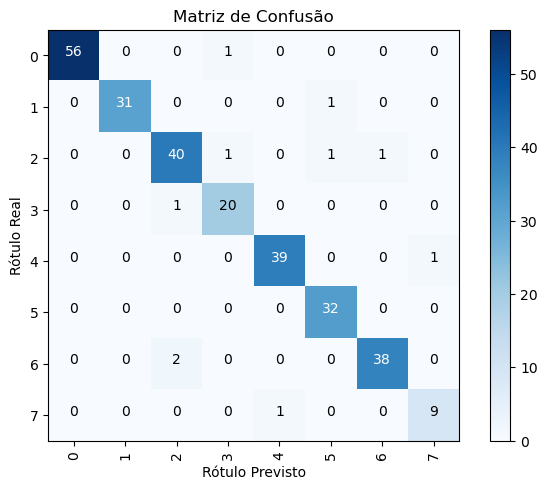

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

cm = confusion_matrix(label_original, label_previsto)

# plotar matriz de confusão
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(0,8)
plt.xticks(tick_marks, rotation=90)
plt.yticks(tick_marks)

# adicionar o número de classes previstas
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.show()


In [12]:
from sklearn.metrics import classification_report


target_names = np.arange(0, 8).astype(str)
print(classification_report(label_original, label_previsto, target_names=target_names))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       1.00      0.97      0.98        32
           2       0.93      0.93      0.93        43
           3       0.91      0.95      0.93        21
           4       0.97      0.97      0.97        40
           5       0.94      1.00      0.97        32
           6       0.97      0.95      0.96        40
           7       0.90      0.90      0.90        10

    accuracy                           0.96       275
   macro avg       0.95      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In [13]:
test_loss, test_acc = modelo.evaluate(test_generator, steps=nb_test_samples // batch_size,verbose=2)
print('Test accuracy:', test_acc)


8/8 - 0s - loss: 0.0012 - accuracy: 1.0000 - 106ms/epoch - 13ms/step
Test accuracy: 1.0


2023-05-16 16:09:14.646320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
